written by ideajoon<br/>
※ 참고 : 딥 러닝을 이용한 자연어 처리 입문 (https://wikidocs.net/book/2155) 자료를 공부하고 정리함

# 08. NLP를 위한 딥 러닝 개요(Deep Learning for NLP)

## 목차
1. 퍼셉트론(Perceptron)
2. 인공 신경망(Artificial Neural Network) 훑어보기
3. 딥 러닝의 학습 방법
4. 역전파(BackPropagation) 이해하기
5. 케라스(Keras) 훑어보기
6. 케라스의 함수형 API(Keras Functional API)
7. 신경망 언어 모델(Neural Network Language Model, NNLM)
8. 순환 신경망(Recurrent Neural Network, RNN)
9. 장단기 메모리(Long Short-Term Memory, LSTM)
10. 게이트 순환 유닛(Gated Recurrent Unit, GRU)
11. RNN 언어 모델을 이용한 텍스트 생성(Text Generation)

## 1. 퍼셉트론(Perceptron)

### 1) 퍼셉트론(Perceptron)

퍼셉트론(Perceptron)은 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 제안한 초기 형태의 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘입니다.

![](https://wikidocs.net/images/page/24958/%EB%89%B4%EB%9F%B0.PNG)

이제 다수의 입력을 받는 퍼셉트론의 그림을 보겠습니다.

![](https://wikidocs.net/images/page/24958/perceptrin1_final.PNG)

각 입력값이 가중치와 곱해져서 인공 뉴런에 보내지고, 각 입력값과 그에 해당되는 가중치의 곱의 전체 합이 임계치(threshold)를 넘으면 종착지에 있는 인공 뉴런은 출력 신호로서 1을 출력하고, 그렇지 않을 경우에는 0을 출력합니다.

이러한 함수를 계단 함수(Step function)라고 하며, 아래는 그래프는 계단 함수의 하나의 예를 보여줍니다.



![](https://wikidocs.net/images/page/24987/step_function.PNG)

초기 인공 신경망 모델인 퍼셉트론은 활성화 함수로 계단 함수를 사용하였지만, 그 뒤에 등장한 여러가지 발전된 신경망들은 계단 함수 외에도 여러 다양한 활성화 함수를 사용하기 시작했습니다.

뉴런에서 출력값을 변경시키는 함수를 활성화 함수(Activation Function)라고 합니다. 

사실 앞서 배운 시그모이드 함수나 소프트맥스 함수 또한 활성화 함수 중 하나입니다.

로지스틱 회귀를 수행하는 인공 뉴런과 위에서 배운 퍼셉트론의 차이는 오직 활성화 함수의 차이입니다.

- 인공 뉴런 : 활성화 함수 $f(\sum_i^{n} W_{i}x_{i} + b)$
- 위의 퍼셉트론(인공 뉴런 종류 중 하나) : 계단 함수 $f(\sum_i^{n} W_{i}x_{i} + b)$

### 2) 단층 퍼셉트론(Single-Layer Perceptron)

![](https://wikidocs.net/images/page/24958/perceptron3_final.PNG)

AND 게이트를 위한 매개변수 값을 가진 단층 퍼셉트론의 식을 파이썬 코드로 간단하게 구현해봅시다.

In [2]:
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [3]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

위의 함수에 AND 게이트의 입력값을 모두 넣어보면 오직 두 개의 입력값이 1인 경우에만 1을 출력합니다.

AND 게이트를 충족하는 가중치와 편향값인 [0.5, 0.5, -0.7]에 -를 붙여서 [-0.5, -0.5, +0.7]을 단층 퍼셉트론의 식에 넣어보면 NAND 게이트를 충족합니다.

In [4]:
def NAND_gate(x1, x2):
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [5]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

 OR 게이트 또한 적절한 가중치 값과 편향 값만 찾으면 단층 퍼셉트론의 식으로 구현할 수 있습니다.

In [6]:
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [8]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

이처럼 단층 퍼셉트론은 AND 게이트, NAND 게이트, OR 게이트 또한 구현할 수 있습니다. 

하지만 단층 퍼셉트론으로 구현이 불가능한 게이트가 있는데 바로 XOR 게이트입니다.

XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트입니다.

아무리 수많은 가중치와 편향을 넣어봐도 XOR 게이트를 구현하는 것은 불가능합니다. 그 이유는 단층 퍼셉트론은 직선 하나로 두 영역을 나눌 수 있는 문제에 대해서만 구현이 가능하기 때문입니다.

예를 들어 AND 게이트에 대한 단층 퍼셉트론을 시각화해보면 다음과 같습니다.

![](https://wikidocs.net/images/page/24958/andgraphgate.PNG)

![](https://wikidocs.net/images/page/24958/oragateandnandgate.PNG)

XOR 게이트를 시각화해보면 다음과 같습니다.

![](https://wikidocs.net/images/page/24958/xorgraphandxorgate.PNG)

하얀색 원과 검은색 원을 직선 하나로 나누는 것은 불가능합니다. 즉, 단층 퍼셉트론으로는 XOR 게이트를 구현하는 것이 불가능합니다.

XOR 게이트는 직선이 아닌 곡선. 비선형 영역으로 분리하면 구현이 가능합니다.

![](https://wikidocs.net/images/page/24958/xorgate_nonlinearity.PNG)

이제 XOR 게이트를 만들 수 있는 다층 퍼셉트론에 대해서 알아보도록 하겠습니다.

### 3) 다층 퍼셉트론(Multi-Layer Perceptron, MLP)

XOR 게이트는 기존의 AND, NAND, OR 게이트를 조합하면 만들 수 있습니다. 

다층 퍼셉트론은 중간에 은닉층이 존재한다는 점이 단층 퍼셉트론과 다릅니다. 다층 퍼셉트론은 줄여서 MLP라고도 부릅니다.

![](https://wikidocs.net/images/page/24958/perceptron_4image.jpg)

위의 그림은 AND, NAND, OR 게이트를 조합하여 XOR 게이트를 구현한 다층 퍼셉트론의 예입니다.

더 어려운 문제를 풀기 위해서 은닉층이 더 추가되고, 뉴런의 개수를 늘린 다층 퍼셉트론의 모습을 보여줍니다.

![](https://wikidocs.net/images/page/24958/%EC%9E%85%EC%9D%80%EC%B8%B5.PNG)

위와 같이 은닉층이 2개 이상인 신경망을 심층 신경망(Deep Neural Network, DNN)이라고 합니다. 

가중치를 수동으로 찾았습니다. 하지만 이제는 기계가 가중치를 스스로 찾아내도록 자동화시켜야하는데, 이것이 머신 러닝에서 말하는 학습(training) 단계에 해당됩니다.

앞서 선형 회귀와 로지스틱 회귀에서 보았듯이 손실 함수(Loss function)와 옵티마이저(Optimizer)를 사용합니다.

## 2. 인공 신경망(Artificial Neural Network) 훑어보기

계단 함수(Step funtion)가 아닌 다른 함수를 도입

### 1) 피드 포워드 신경망(Feed-Forward Neural Network, FFNN)

입력층에서 출력층 방향으로 연산이 전개되는 신경망을 피드 포워드 신경망이라고 합니다. 줄여서 FFNN이라고도 합니다.

![](https://wikidocs.net/images/page/24987/rnn_image1_%EC%88%98%EC%A0%95.PNG)

위의 그림은 대표적으로 FFNN이 아닌 RNN이라는 신경망을 보여줍니다. 

이 신경망은 은닉층의 출력값을 출력층으로도 값을 보내지만, 동시에 은닉층의 출력값이 다시 은닉층의 입력으로 사용되는데 이는 FFNN의 정의에 벗어납니다.

### 2) 전결합층(Fully-connected layer, FC, Dense layer)

어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결돼 있는 층을 전결합층이라고 합니다. 줄여서 FC라고 부르기도 합니다.

즉, 앞서 본 다층 퍼셉트론의 모든 은닉층과 출력층은 전결합층입니다.

이와 동일한 의미로 밀집층(Dense layer)이라고 부르기도 하는데, 케라스에서는 밀집층을 구현할 때 Dense()를 사용합니다.

만약 전결합층만으로 구성된 피드 포워드 신경망이 있다면, 이를 전결합 피드 포워드 신경망(Fully-connected FFNN)이라고도 합니다.

### 3) 활성화 함수(Activation Function)

![](https://wikidocs.net/images/page/24987/activation_function_final.PNG)

은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수를 활성화 함수(Activation function)라고 하는데 계단 함수는 이러한 활성화 함수의 하나의 예제에 불과합니다.

#### (1) 활성화 함수의 특징 - 비선형 함수(Nonlinear function)

활성화 함수의 특징은 선형 함수가 아닌 비선형 함수여야 한다는 점입니다.

인공 신경망에서 활성화 함수는 반드시 비선형 함수여야 합니다.

인공 신경망의 능력을 키우기 위해서는 은닉층을 계속해서 추가해야 합니다. 그런데 만약 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없습니다.

파이썬을 통해 주로 사용되는 활성화 함수를 직접 그려보고, 이해해보도록 하겠습니다.

In [9]:
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

#### (2) 계단 함수(Step function)

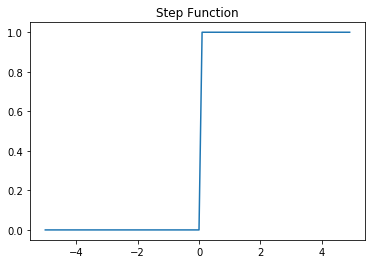

In [10]:
def step(x):
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

퍼셉트론을 통해 처음으로 인공 신경망을 배울 때 가장 처음 접하게 되는 활성화 함수입니다.

#### (3) 시그모이드 함수(Sigmoid function)

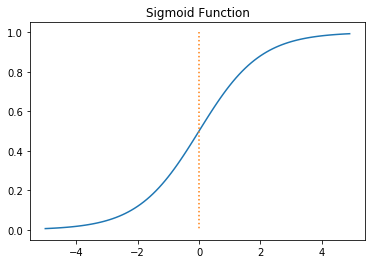

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

시그모이드 함수는 가중치 곱의 합을 0과 1사이의 값으로 조정하여 반환하는 활성화 함수입니다.

시그모이드 함수는 마치 S자의 모양을 연상시키며, 로지스틱 함수(logistic function)라고도 부릅니다.

시그모이드 함수는 특정 목적으로 출력층의 뉴런에서 주로 사용되는데, 두 가지 선택지 중 하나를 고르는 이진 분류 문제(Binary Classification)에 사용합니다. 

시그모이드 함수는 입력에 따라 출력이 연속적으로 변하는 곡선의 모양을 가진다는 것입니다.

인공 신경망은 역전파(Back Propagation)라는 과정을 통해 인공 신경망에 경사 하강법을 수행하는데, 이때 인공 신경망의 전체 식의 일부에 해당하는 활성화 함수도 미분의 대상이 됩니다. 앞서 배웠듯이 경사 하강법은 접선의 기울기를 이용합니다. 그런데 계단 함수는 거의 모든 구간에서 기울기가 0이므로 학습이 제대로 되지 않습니다.

#### (4) 렐루 함수(Relu function)

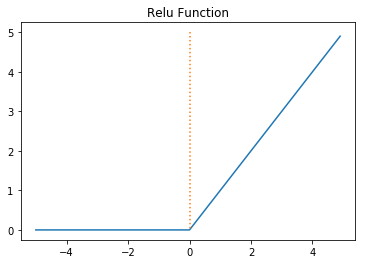

In [12]:
def relu(x):
    return np.maximum(0, x)
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

은닉층에서 활성화 함수로 가장 많이 사용되는 활성화 함수입니다. 

하지만 입력값이 0보다 작을 경우, 미분값이 0이 되는 단점이 존재하는데 이를 보완한 Leaky ReLU와 같은 ReLU의 변형 함수들이 등장하기 시작했습니다. 

#### (5) 하이퍼볼릭탄젠트 함수(Tanh function)

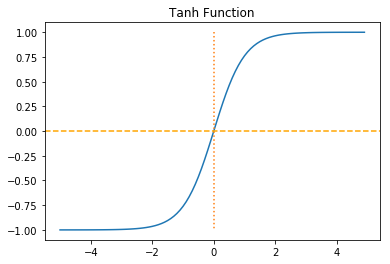

In [13]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)
plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

은닉층에서 활성화 함수로 종종 사용되는 활성화 함수입니다.

이미지 인식 분야에서 자주 사용되는 인공 신경망인 CNN에서는 ReLu 함수가 주로 사용되고,

자연어 처리 분야에서 자주 사용되는 인공 신경망인 LSTM에서는 tanh 함수와 시그모이드 함수가 주로 사용됩니다.

#### (6) 소프트맥스 함수(Softmax function)

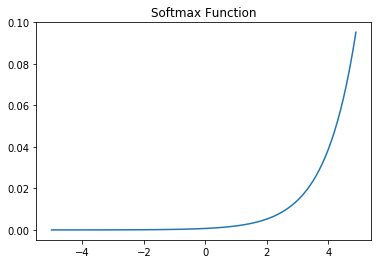

In [19]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))
plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

시그모이드 함수처럼 출력층의 뉴런에서 주로 사용

시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용

소프트맥스 함수는 세 가지 이상의 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용

### 4) 행렬의 곱셈을 이용한 순전파(Forward Propagation)

![](https://wikidocs.net/images/page/24987/neuralnetwork.PNG)

위와 같은 인공 신경망이 있다고 합시다. 주어진 인공 신경망을 케라스로 구현해본다면 아래와 같이 짧은 코드로 구현할 수 있습니다.

In [23]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential() # 층을 추가할 준비
model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
# 입력층(4)과 다음 은닉층(8) 그리고 은닉층의 활성화 함수는 relu
model.add(Dense(8, activation='relu')) # 은닉층(8)의 활성화 함수는 relu
model.add(Dense(3, activation='softmax')) # 출력층(3)의 활성화 함수는 softmax

C:\Users\joon2\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=4, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


위의 코드의 주석에서 () 괄호 안의 값은 각 층에서의 뉴런의 수를 의미하며 입력층부터 출력층까지 순차적으로 인공 신경망의 층을 한 층씩 추가하였습니다.

인공 신경망에서 입력층에서 출력층 방향으로 연산을 진행하는 과정을 순전파(Forward Propagation)라고 합니다. 다르게 말하면 주어진 입력으로부터 예측값을 계산하는 과정을 순전파라고 합니다.

벡터와 행렬 연산이 순전파 과정에서 층(layer)마다 적용이 됩니다.

Numpy 등을 통해 인공 신경망을 로우 레벨로 개발하고 있다면 인공 신경망 내부 연산에 사용하는 행렬 크기를 고려해야 인공 신경망을 구현할 수 있습니다.

#### (1) layer 1의 행렬 크기 추정하기

- 입력층 : 4개의 입력과 8개의 출력
- 은닉층1 : 8개의 입력과 8개의 출력
- 은닉층2 : 8개의 입력과 3개의 출력
- 출력층 : 3개의 입력과 3개의 출력

여기서는 편의상 입력층을 layer 0, 은닉층 1을 layer 1, 은닉층 2를 layer 2, 출력층을 layer 3라고 해봅시다.

 층마다 생기는 가중치와 편향 행렬의 크기를 추정해봅시다.

또한 배치 크기는 1로 합니다.

이 경우 layer 1에서 처음 입력으로 들어오는 입력 행렬 X의 크기는 1 × 4로 행벡터에 해당됩니다. (만약 미니 배치 학습을 가정할 경우, X의 크기는 배치의 크기 × 4가 됩니다.)

앞서 벡터와 행렬 연산 챕터에서 배운 바에 따르면, 입력 행렬, 가중치 행렬, 편향 행렬, 출력 행렬은 다음과 같은 크기 관계를 가집니다.

$X_{m\ \text{×}\ n} × W_{n\ \text{×}\ j} + B_{m\ \text{×}\ j} = Y_{m\ \text{×}\ j}$

layer 1의 입력 행렬 X 의 크기는 1 × 4입니다. layer 1의 출력은 8개이므로, 그에 따라 출력 행렬 Y의 크기는 1 × 8이 됩니다.

$X_{1\ \text{×}\ 4} × W_{n\ \text{×}\ j} + B_{m\ \text{×}\ j} = Y_{1\ \text{×}\ 8}$

그런데 가중치 행렬 W의 행은 입력 행렬 X의 열과 같아야 하므로 아래와 같습니다.

$X_{1\ \text{×}\ 4} × W_{4\ \text{×}\ j} + B_{m\ \text{×}\ j} = Y_{1\ \text{×}\ 8}$

가중치 행렬 W의 열은 출력 행렬 Y의 열과 동일해야 합니다.

$X_{1\ \text{×}\ 4} × W_{4\ \text{×}\ 8} + B_{1\ \text{×}\ 8} = Y_{1\ \text{×}\ 8}$

이제 layer 1의 출력 행렬 Y는 layer 2에서는 입력 행렬 X가 됩니다.

#### (1) layer 2와 layer 3의 행렬 크기 추정하기

이를 반복하면 layer 2와 layer 3에서의 가중치 행렬과 편향 행렬의 크기를 구할 수 있습니다. 

- layer 2 : $X_{1\ \text{×}\ 8} × W_{8\ \text{×}\ 8} + B_{1\ \text{×}\ 8} = Y_{1\ \text{×}\ 8}$
- layer 3 : $X_{1\ \text{×}\ 8} × W_{8\ \text{×}\ 3} + B_{1\ \text{×}\ 3} = Y_{1\ \text{×}\ 3}$

이와 같이 순전파를 진행하고 예측값을 구하고나서 이 다음에 인공 신경망이 해야할 일은 예측값과 실제값으로부터 오차를 계산하고, 오차로부터 가중치와 편향을 업데이트하는 일입니다.

이때 인공 신경망은 순전파와는 반대 방향으로 연산을 진행하며 가중치를 업데이트하는데, 이 과정을 역전파(BackPropagation)라고 합니다.

## 3. 딥 러닝의 학습 방법

### 1) 순전파(Foward Propagation)

![](https://wikidocs.net/images/page/36033/%EC%88%9C%EC%A0%84%ED%8C%8C.PNG)

입력값은 입력층, 은닉층을 지나면서 각 층에서의 가중치와 함께 연산되며 출력층으로 향합니다. 그리고 출력층에서 모든 연산을 마친 예측값이 나오게 됩니다.

### 2) 손실 함수(Loss function)

![](https://wikidocs.net/images/page/36033/%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98.PNG)

손실 함수는 실제값과 예측값의 차이를 수치화해주는 함수입니다.

회귀에서는 평균 제곱 오차, 분류 문제에서는 크로스 엔트로피를 주로 손실 함수로 사용합니다. 

#### (1) MSE(Mean Squared Error, MSE)

오차 제곱 평균을 의미합니다. 연속형 변수를 예측할 때 사용됩니다.

![](https://wikidocs.net/images/page/24987/mse.PNG)

#### (2) 크로스 엔트로피(Cross-Entropy)

y : 실제값 (0 or 1) / $\hat{y}$ : 예측값 (확률)

![](https://wikidocs.net/images/page/24987/%ED%81%AC%EB%A1%9C%EC%8A%A4%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC.PNG)

이진 분류 (Binary Classification)의 경우 binary_crossentropy를 사용하며

다중클래스 분류(Multi-Class Classification)의 경우 categorical_crossentropy를 사용

### 3) 옵티마이저(Optimizer)

![](https://wikidocs.net/images/page/36033/%EC%97%AD%EC%A0%84%ED%8C%8C_%EA%B3%BC%EC%A0%95.PNG)

손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라집니다.

 배치는 가중치 등의 매개 변수의 값을 조정하기 위해 사용하는 데이터의 양을 말합니다. 

전체 데이터를 가지고 매개 변수의 값을 조정할 수도 있고, 정해준 양의 데이터만 가지고도 매개 변수의 값을 조정할 수 있습니다.

#### (1) 배치 경사 하강법(Batch Gradient Descent)

배치 경사 하강법은 옵티마이저 중 하나로 오차(loss)를 구할 때 전체 데이터를 고려합니다.

머신 러닝에서는 1번의 훈련 횟수를 1 에포크라고 하는데, 배치 경사 하강법은 한 번의 에포크에 모든 매개변수 업데이트를 단 한 번 수행합니다.

배치 경사 하강법은 전체 데이터를 고려해서 학습하므로 에포크당 시간이 오래 걸리며, 메모리를 크게 요구한다는 단점이 있으나 글로벌 미니멈을 찾을 수 있다는 장점이 있습니다.

In [25]:
# model.fit(X_train, y_train, batch_size=len(trainX))

#### (2) 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

기존의 배치 경사 하강법은 전체 데이터에 대해서 계산을 하다보니 시간이 너무 오래걸린다는 단점이 있습니다. 

확률적 경사 하강법은 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법입니다. 더 적은 데이터를 사용하므로 더 빠르게 계산할 수 있습니다.

![](https://wikidocs.net/images/page/24987/%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95SGD.PNG)

매개변수의 변경폭이 불안정하고, 때로는 배치 경사 하강법보다 정확도가 낮을 수도 있지만 속도만큼은 배치 경사 하강법보다 빠르다는 장점이 있습니다.

In [26]:
# model.fit(X_train, y_train, batch_size=1)

#### (3) 미니 배치 경사 하강법(Mini-Batch Gradient Descent)

전체 데이터도 아니고, 1개의 데이터도 아니고 정해진 양에 대해서만 계산하여 매개 변수의 값을 조정하는 경사 하강법을 미니 배치 경사 하강법이라고 합니다. 

미니 배치 경사 하강법은 전체 데이터를 계산하는 것보다 빠르며, SGD보다 안정적이라는 장점이 있습니다.

실제로 가장 많이 사용되는 경사 하강법입니다.

In [27]:
# model.fit(X_train, y_train, batch_size=32) #32를 배치 크기로 하였을 경우

#### (4) 모멘텀(Momentum)

모멘텀(Momentum)은 관성이라는 물리학의 법칙을 응용한 방법입니다.

모멘텀 SGD는 경사 하강법에 관성을 더 해줍니다.

모멘텀은 SGD에서 계산된 접선의 기울기에 한 시점(step) 전의 접선의 기울기값을 일정한 비율만큼 반영합니다. 이렇게 하면 마치 언덕에서 공이 내려올 때, 중간에 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줄 수 있습니다.

![](https://wikidocs.net/images/page/24987/%EB%A1%9C%EC%BB%AC%EB%AF%B8%EB%8B%88%EB%A9%88.PNG)

다시 말해 로컬 미니멈에 도달하였을 때, 기울기가 0이라서 기존의 경사 하강법이라면 이를 글로벌 미니멈으로 잘못 인식하여 계산이 끝났을 상황이라도 모멘텀. 즉, 관성의 힘을 빌리면 값이 조절되면서 로컬 미니멈에서 탈출하는 효과를 얻을 수도 있습니다.

In [28]:
# keras.optimizers.SGD(lr = 0.01, momentum= 0.9)

#### (5) 아다그라드(Adagrad)

매개변수들은 각자 의미하는 바가 다른데, 모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적입니다. 

아다그라드는 각 매개변수에 서로 다른 학습률을 적용시킵니다. 이 때, 변화가 많은 매개변수는 학습률이 작게 설정되고 변화가 적은 매개변수는 학습률을 높게 설정시킵니다.

In [29]:
# keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)

#### (6) 알엠에스프롭(RMSprop)

아다그라드는 학습을 계속 진행한 경우에는, 나중에 가서는 학습률이 지나치게 떨어진다는 단점이 있는데 이를 다른 수식으로 대체하여 이러한 단점을 개선하였습니다.

In [30]:
# keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)

#### (7) 아담(Adam)

아담은 알엠에스프롭과 모멘텀 두 가지를 합친 듯한 방법으로, 방향과 학습률 두 가지를 모두 잡기 위한 방법입니다.

In [31]:
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

케라스의 옵티마이저 사용법은 아래의 링크에서 좀 더 상세히 확인할 수 있습니다.<br/>
링크 : https://keras.io/optimizers/

### 4) 역전파(BackPropagation)

순전파와는 반대 방향으로 연산을 진행하며 가중치를 업데이트하는데, 이 과정을 역전파(BackPropagation)라고 합니다.

### 5) 에포크와 배치 크기와 이터레이션(Epochs and Batch size and Iteration)

기계는 실제값과 예측값의 오차로부터 옵티마이저를 통해서 가중치를 업데이트합니다.

![](https://wikidocs.net/images/page/36033/batchandepochiteration.PNG)

위의 그림은 에포크와 배치 크기와 이터레이션의 차이를 보여줍니다.

#### (1) 에포크(Epoch)

에포크란 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태를 말합니다. 

전체 데이터를 하나의 문제지에 비유한다면 문제지의 모든 문제를 끝까지 다 풀고, 정답지로 채점을 하여 문제지에 대한 공부를 한 번 끝낸 상태를 말합니다.

만약 에포크가 50이라고 하면, 전체 데이터 단위로는 총 50번 학습합니다. 문제지에 비유하면 문제지를 50번 푼 셈입니다. 이 에포크 횟수가 지나치거나 너무 적으면 앞서 배운 과적합과 과소적합이 발생할 수 있습니다.

#### (2) 배치 크기(Batch size)

배치 크기는 몇 개의 데이터 단위로 매개변수를 업데이트 하는지를 말합니다.

문제지에서 몇 개씩 문제를 풀고나서 정답지를 확인하느냐의 문제입니다. 사람은 문제를 풀고 정답을 보는 순간 부족했던 점을 깨달으며 지식이 업데이트 된다고 하였습니다.

기계 입장에서는 실제값과 예측값으로부터 오차를 계산하고 옵티마이저가 매개변수를 업데이트합니다. 여기서 중요한 포인트는 업데이트가 시작되는 시점이 정답지/실제값을 확인하는 시점이라는 겁니다.

사람이 2,000 문제가 수록되어있는 문제지의 문제를 200개 단위로 풀고 채점한다고 하면 이때 배치 크기는 200입니다. 기계는 배치 크기가 200이면 200개의 샘플 단위로 가중치를 업데이트 합니다.

여기서 주의할 점은 배치 크기와 배치의 수는 다른 개념이라는 점입니다.

전체 데이터가 2,000일때 배치 크기를 200으로 준다면 배치의 수는 10입니다. 

이는 에포크에서 배치 크기를 나눠준 값(2,000/200 = 10)이기도 합니다.

#### (3) 이터레이션(Iteration)

이터레이션이란 한 번의 에포크를 끝내기 위해서 필요한 배치의 수를 말합니다.

또는 한 번의 에포크 내에서 이루어지는 매개변수의 업데이트 횟수이기도 합니다.

전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10개입니다. 

 이는 한 번의 에포크 당 매개변수 업데이트가 10번 이루어진다는 것을 의미합니다. 

SGD를 이 개념을 가지고 다시 설명하면, SGD는 배치 크기가 1이므로 모든 이터레이션마다 하나의 데이터를 선택하여 경사 하강법을 수행합니다.

### 6) 과적합을 막는 방법

과적합은 주로 훈련 데이터의 양이 적거나, 매개변수가 많은 모델에서 주로 일어나며 과하게 훈련되어 훈련 데이터에 대해서는 정확도가 높지만 그 외의 데이터에 대해서는 정확도가 낮은 상태를 말합니다.

#### (1) 조기 종료(Early Stopping)

과적합을 막는 방법 중 하나는 훈련을 조기 종료 하는 것입니다.

훈련 데이터뿐만 아니라, 검증 데이터에 대해서도 정확도에 대한 모니터링을 진행하면서 검증 데이터에 대한 정확도가 꾸준히 낮아지는 순간이 발견된다면, 정확도가 낮아지기 전의 가장 정확도가 높은 순간을 가장 적절한 훈련 에포크로 잡으면 됩니다.

#### (2) 드롭아웃(DropOut)

인공 신경망 학습 중에 어떤 확률 p(하이퍼파라미터)를 기준으로 선택된 노드들을 학습에 사용하지 않도록 합니다.

즉, 임의의 확률로 일부 뉴런들을 비활성화 시킵니다.

이는 인공 신경망이 특정 뉴런이나 특정 뉴런들의 조합에 너무 의존적으로 변하는 것을 방지합니다. 이 작업은 매 학습마다 무작위로 뉴런들을 선택해서 학습에서 제외시키는데 이렇게 하면 다양한 조합으로 학습이 되는 효과가 있습니다.

#### (3) 정규화(Regularization)

### 7) 모델의 성능 조정

### 8) 딥 러닝 모델의 평가

![](https://wikidocs.net/images/page/24987/%EB%8D%B0%EC%9D%B4%ED%84%B0.PNG)

## 4. 역전파(BackPropagation) 이해하기

### 1) 인공 신경망의 이해(Neural Network Overview)

역전파의 이해를 위해서 여기서 사용할 인공 신경망은 입력층, 은닉층, 출력층 이렇게 3개의 층을 가집니다. 또한 해당 인공 신경망은 두 개의 입력과, 두 개의 은닉층 뉴런, 두 개의 출력층 뉴런을 사용합니다. 은닉층과 출력층의 모든 뉴런은 활성화 함수로 시그모이드 함수를 사용합니다.

![](https://wikidocs.net/images/page/37406/nn1_final.PNG)

은닉층과 출력층의 모든 뉴런에서 변수 z가 존재하는데 여기서 변수 z는 이전층의 모든 입력이 각각의 가중치와 곱해진 값들이 모두 더해진 가중합을 의미합니다.

이 값은 뉴런에서 아직 시그모이드 함수를 거치지 않은 상태입니다. 즉, 활성화 함수의 입력을 의미합니다. z 우측의 |를 지나서 존재하는 변수 h 또는 o는 z가 시그모이드 함수를 지난 후의 값으로 각 뉴런의 출력값을 의미합니다. 

해당 인공 신경망은 편향 b는 고려하지 않습니다.

### 2) 순전파(Forward Propagation)

![](https://wikidocs.net/images/page/37406/nn2_final_final.PNG)

파란색 숫자는 입력값을 의미하며, 빨간색 숫자는 각 가중치의 값을 의미합니다. 앞으로 진행하는 계산의 결과값은 소수점 아래 여덟번째 자리까지 반올림하여 표기합니다.

$z_{1}=W_{1}x_{1} + W_{2}x_{2}=0.3 \text{×} 0.1 + 0.25 \text{×} 0.2= 0.08$<br/>
$z_{2}=W_{3}x_{1} + W_{4}x_{2}=0.4 \text{×} 0.1 + 0.35 \text{×} 0.2= 0.11$

$h_{1}=sigmoid(z_{1}) = 0.51998934$<br/>
$h_{2}=sigmoid(z_{2}) = 0.52747230$

$z_{3}=W_{5}h_{1}+W_{6}h_{2} = 0.45 \text{×} h_{1} + 0.4 \text{×} h_{2} = 0.44498412$<br/>
$z_{4}=W_{7}h_{1}+W_{8}h_{2} = 0.7 \text{×} h_{1} + 0.6 \text{×} h_{2} = 0.68047592$

$o_{1}=sigmoid(z_{3})=0.60944600$<br/>
$o_{2}=sigmoid(z_{4})=0.66384491$

이제 해야할 일은 예측값과 실제값의 오차를 계산하기 위한 오차 함수를 선택하는 것입니다. 오차(Error)를 계산하기 위한 손실 함수(Loss function)로는 평균 제곱 오차 MSE를 사용합니다. 

식에서는 실제값을 target이라고 표현하였으며, 순전파를 통해 나온 예측값을 output으로 표현하였습니다. 그리고 각 오차를 모두 더하면 전체 오차 $E_{total}$가 됩니다.

- $E_{o1}=\frac{1}{2}(target_{o1}-output_{o1})^{2}=0.02193381$<br/>
- $E_{o2}=\frac{1}{2}(target_{o2}-output_{o2})^{2}=0.00203809$<br/>
- $E_{total}=E_{o1}+E_{o2}=0.02397190$

### 3) 역전파 1단계(BackPropagation Step 1)

역전파는 반대로 출력층에서 입력층 방향으로 계산하면서 가중치를 업데이트해갑니다.

- 역전파 1단계<br/>
출력층 바로 이전의 은닉층을 N층이라고 하였을 때, 출력층과 N층 사이의 가중치를 업데이트하는 단계

![](https://wikidocs.net/images/page/37406/nn3_final.PNG)

역전파 1단계에서 업데이트 해야 할 가중치는 W5,W6,W7,W8 총 4개입니다. 원리 자체는 동일하므로 우선 W5에 대해서 먼저 업데이트를 진행해보겠습니다.

경사 하강법을 수행하려면 가중치 W5를 업데이트 하기 위해서 $\frac{∂E_{total}}{∂W_{5}}$를 계산해야 합니다.

$\frac{∂E_{total}}{∂W_{5}}$를 계산하기 위해 미분의 연쇄 법칙(Chain rule)에 따라서 이와 같이 풀어 쓸 수 있습니다.

$\frac{∂E_{total}}{∂W_{5}} = \frac{∂E_{total}}{∂o_{1}} \text{×} \frac{∂o_{1}}{∂z_{3}} \text{×} \frac{∂z_{3}}{∂W_{5}}$

Etotal은 앞서 순전파를 진행하고 계산했던 전체 오차값입니다. 식은 다음과 같습니다.

$E_{total}=\frac{1}{2}(target_{o1}-output_{o1})^{2} + \frac{1}{2}(target_{o2}-output_{o2})^{2}$

이에 $\frac{∂E_{total}}{∂o_{1}}$는 다음과 같습니다.

$\frac{∂E_{total}}{∂o_{1}}=2 \text{×} \frac{1}{2}(target_{o1}-output_{o1})^{2-1} \text{×} (-1) + 0$

$\frac{∂E_{total}}{∂o_{1}}=-(target_{o1}-output_{o1})=-(0.4-0.60944600)=0.20944600$

이제 두번째 항을 주목해봅시다. o1이라는 값은 시그모이드 함수의 출력값입니다. 그런데 시그모이드 함수의 미분은 f(x)×(1−f(x))입니다. 앞으로의 계산 과정에서도 계속해서 시그모이드 함수를 미분해야 하는 상황이 생기므로 기억해둡시다.

(시그모이드 함수 미분 참고 링크 : https://en.wikipedia.org/wiki/Logistic_function#Derivative)

두번째 항의 미분 결과는 다음과 같습니다.

$\frac{∂o_{1}}{∂z_{3}}=o_{1}\text{×}(1-o_{1})=0.60944600(1-0.60944600)=0.23802157$

마지막으로 세번째 항은 h1의 값과 동일합니다.

$\frac{∂z_{3}}{∂W_{5}}=h_{1}=0.51998934$

우변의 모든 항을 계산하였습니다. 이제 이 값을 모두 곱해주면 됩니다.

$\frac{∂E_{total}}{∂W_{5}} = 0.20944600 \text{×} 0.23802157 \text{×} 0.51998934 = 0.02592286$

이제 앞서 배웠던 경사 하강법을 통해 가중치를 업데이트 할 때가 왔습니다! 

하이퍼파라미터에 해당되는 학습률(learning rate) α는 0.5라고 가정합니다.

$W_{5}^{+}=W_{5}-α\frac{∂E_{total}}{∂W_{5}}=0.45- 0.5 \text{×} 0.02592286=0.43703857$

이와 같은 원리로 $W_{6}^{+},\ W_{7}^{+},\ W_{8}^{+}$을 계산할 수 있습니다.

$\frac{∂E_{total}}{∂W_{6}} = \frac{∂E_{total}}{∂o_{1}} \text{×} \frac{∂o_{1}}{∂z_{3}} \text{×} \frac{∂z_{3}}{∂W_{6}} → W_{6}^{+}=0.38685205$<br/>
$\frac{∂E_{total}}{∂W_{7}} = \frac{∂E_{total}}{∂o_{2}} \text{×} \frac{∂o_{2}}{∂z_{4}} \text{×} \frac{∂z_{4}}{∂W_{7}} → W_{7}^{+}=0.69629578$<br/>
$\frac{∂E_{total}}{∂W_{8}} = \frac{∂E_{total}}{∂o_{2}} \text{×} \frac{∂o_{2}}{∂z_{4}} \text{×} \frac{∂z_{4}}{∂W_{8}} → W_{8}^{+}=0.59624247$

### 4) 역전파 2단계(BackPropagation Step 2)

![](https://wikidocs.net/images/page/37406/nn4.PNG)

1단계를 완료하였다면 이제 입력층 방향으로 이동하며 다시 계산을 이어갑니다.

현재 인공 신경망은 은닉층이 1개밖에 없으므로 이번 단계가 마지막 단계입니다. 하지만 은닉층이 더 많은 경우라면 입력층 방향으로 한 단계씩 계속해서 계산해가야 합니다.

이번 단계에서 계산할 가중치는 $W_{1}, W_{2}, W_{3}, W_{4}$입니다. 원리 자체는 동일하므로 우선 W1에 대해서 먼저 업데이트를 진행해보겠습니다. 경사 하강법을 수행하려면 가중치 W1를 업데이트 하기 위해서 $\frac{∂E_{total}}{∂W_{1}}$를 계산해야 합니다.

1단계와 같은 방법으로 풀면,

$\frac{∂E_{total}}{∂W_{1}} = 0.03240681 \text{×} 0.24960043 \text{×} 0.1 = 0.00080888$

경사 하강법을 통해 가중치를 업데이트 할 수 있습니다.

$W_{1}^{+}=W_{1}-α\frac{∂E_{total}}{∂W_{1}}=0.1- 0.5 \text{×} 0.00080888=0.29959556$

이와 같은 원리로 $W_{2}^{+},\ W_{3}^{+},\ W_{4}^{+}$을 계산할 수 있습니다.

$\frac{∂E_{total}}{∂W_{2}} = \frac{∂E_{total}}{∂h_{1}} \text{×} \frac{∂h_{1}}{∂z_{1}} \text{×} \frac{∂z_{1}}{∂W_{2}}  → W_{2}^{+}=0.24919112$<br/>
$\frac{∂E_{total}}{∂W_{3}} = \frac{∂E_{total}}{∂h_{2}} \text{×} \frac{∂h_{2}}{∂z_{2}} \text{×} \frac{∂z_{2}}{∂W_{3}}  → W_{3}^{+}=0.39964496$<br/>
$\frac{∂E_{total}}{∂W_{4}} = \frac{∂E_{total}}{∂h_{2}} \text{×} \frac{∂h_{2}}{∂z_{2}} \text{×} \frac{∂z_{2}}{∂W_{4}} → W_{4}^{+}=0.34928991$

### 5) 결과 확인

![](https://wikidocs.net/images/page/37406/nn1_final.PNG)

업데이트 된 가중치에 대해서 다시 한 번 순전파를 진행하여 오차가 감소하였는지 확인해보겠습니다.

![](back.png)

기존의 전체 오차 Etotal가 0.02397190였으므로 1번의 역전파로 오차가 감소한 것을 확인할 수 있습니다. 인공 신경망의 학습은 오차를 최소화하는 가중치를 찾는 목적으로 순전파와 역전파를 반복하는 것을 말합니다.

## 5. 케라스(Keras) 훑어보기

케라스 공식 문서 (https://keras.io/) 를 참고

### 1) 전처리(Preprocessing)

Tokenizer() : 토큰화와 정수 인코딩(단어에 대한 인덱싱)을 위해 사용됩니다.

In [38]:
from keras.preprocessing.text import Tokenizer
t  = Tokenizer()
fit_text = "The earth is an awesome place live"
t.fit_on_texts([fit_text])

test_text = "The earth is an great place live"
sequences = t.texts_to_sequences([test_text])[0]

print("sequences : ",sequences,'\n') # great는 단어 집합(vocabulary)에 없으므로 출력되지 않는다.
print("word_index : ",t.word_index) # 단어 집합(vocabulary) 출력

sequences :  [1, 2, 3, 4, 6, 7] 

word_index :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


- 패딩(padding) 작업<br/>
각 문서 또는 문장은 단어의 수가 제각각입니다. 모델의 입력으로 사용하려면 데이터의 모든 샘플의 길이를 동일하게 맞추는 작업

pad_sequence()는 정해준 길이에 모든 샘플의 길이를 동일하게 바꿔줍니다. 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채웁니다.

In [39]:
from keras.preprocessing.sequence import pad_sequences

pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')
# 전처리가 끝나서 각 단어에 대한 정수 인코딩이 끝났다고 가정하고, 3개의 데이터를 입력으로 합니다.

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

- 첫번째 인자 = 패딩을 진행할 데이터
- maxlen = 모든 데이터에 대해서 정규화 할 길이
- padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움.

### 2) 워드 임베딩(Word Embedding)

워드 임베딩이란 텍스트를 기계가 숫자로서 텍스트를 이해할 수 있도록 텍스트로 표현되었던 단어들을 밀집 벡터(dense vector)로 만드는 것을 말합니다.

원-핫 벡터는 단어의 수만큼 벡터의 차원을 가져야 한다는 단점이 있습니다. 대부분의 값이 0인 이러한 벡터를 희소 벡터(sparse vector)라고 합니다. 즉, 원-핫 벡터는 희소 벡터의 하나의 예입니다.

반면, 희소 벡터와 표기상으로도 의미상으로도 반대인 벡터가 있습니다. 바로 대부분의 값이 실수이고, 대체적으로 저차원 벡터인 밀집 벡터(dense vector)입니다. 아래는 밀집 벡터의 예입니다.

Ex) [0.1 -1.2 0.8 0.2 1.8] # 차원이 대체적으로 작고 실수값을 가짐

|분류|원-핫 벡터|임베딩 벡터|
|---|---|---|
|차원|고차원(단어 집합의 크기)|저차원|
|다른 표현|희소 벡터의 일종|밀집 벡터의 일종|
|표현 방법|수동|훈련 데이터로부터 학습함|
|값의 타입|1과 0|실수|

 단어를 이러한 밀집 벡터로 만드는 작업을 워드 임베딩(Word embedding)이라고 합니다.

그리고 이 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과라고 하여 임베딩 벡터(Embedding Vector)라고도 합니다.

원-핫 벡터의 차원이 주로 20,000 이상을 넘어가는 것에 비해 임베딩 벡터는 주로 256, 512, 1024 등의 차원을 가집니다.

케라스의 Embedding()이 만들어내는 임베딩 벡터는 초기에는 랜덤의 값을 가지다가, 인공 신경망의 가중치가 학습되는 방법과 같은 방식으로 점차 값이 바뀌어갑니다.

- Embedding()<br/>
Embedding()은 단어를 밀집 벡터로 만드는 역할을 합니다. 인공 신경망의 구조적 관점에서는 임베딩 층(Embedding layer)을 만드는 역할을 한다고 말할 수 있습니다.<br/>
이때, Embedding()의 입력으로 각 단어는 이미 정수 인코딩이 된 상태여야 합니다. Embedding()은 정수 인코딩이 된 상태의 입력을 받아서 임베딩을 수행합니다.<br/>
실제로는 Embedding()을 사용하기 위해서는 뒤에서 배우게 될 Sequential()를 먼저 사용해야 합니다.

Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이 때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다.

Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimentionality)인 3D 텐서를 리턴합니다.

In [41]:
# 문장 토큰화와 단어 토큰화가 되어 있는 상태라고 가정
text=[['Hope', 'to', 'see', 'you', 'soon'],['Nice', 'to', 'see', 'you', 'again']]

# 위 데이터에 대해서 정수 인코딩을 수행하였다고 가정
text=[[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 다음과 같이 위 데이터에 대해서 임베딩 층을 만들고, 위 데이터를 통과시킨다고 가정
from keras.layers import Embedding
Embedding(7, 2, input_length=5)
# 7은 단어의 개수. 즉, 단어 집합(vocabulary)의 크기이다.
# 2는 임베딩한 후의 벡터의 크기이다.
# 5는 각 입력 시퀀스의 길이. 즉, input_length이다.

# 각각의 단어에 대해서 Embeddig()이 리턴한 임베딩 벡터 또는 밀집 벡터의 예는 다음과 같다.
# +------------+------------+
# |   index    |  Embedding |
# +------------+------------+
# |     0      | [1.2, 3.1] |
# |     1      | [0.1, 4.2] |
# |     2      | [1.0, 3.1] |
# |     3      | [0.3, 2.1] |
# |     4      | [2.2, 1.4] |
# |     5      | [0.7, 1.7] |
# |     6      | [4.1, 2.0] |
# +------------+------------+
# 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.

Embedding()에 넣어야하는 대표적인 인자는 다음과 같습니다.

- 첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수
- 두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
- input_length = 입력 시퀀스의 길이

### 3) 모델링(Modeling)

- Sequential()<br/>
앞서 퍼셉트론 챕터와 인공 신경망 챕터에서 입력층, 은닉층, 출력층에 대해서 배운 바 있습니다. 케라스에서는 이러한 층을 구성하는 함수로 Sequential() 함수를 사용합니다. 사용 방법은 Sequential() 함수를 model로 선언해 놓고 model.add()라는 코드를 통해 새로운 층을 만듭니다.

사실 앞서 배운 Embedding()을 통해 생성하는 임베딩 층(embedding layer) 또한 인공 신경망의 층의 하나이므로, Sequential() 함수를 model로 선언해 놓고 model.add()로 추가해야합니다.

아래는 임베딩 층을 추가하는 예제 코드입니다.

- Dense()<br/>
몇 개의 뉴런을 만들지 숫자를 기재하여, 결정하는 역할을 합니다. Sequential() 함수를 model로 선언해 놓고 model.add()를 통해 추가할 수 있습니다.

위의 코드에서 Dense()는 한번 사용되었습니다.<br/>
우선, Dense() 함수의 대표적인 인자를 보겠습니다.

- 첫번째 인자 = 출력 뉴런의 수.
- input_dim = 입력 뉴런의 수. (입력의 차원)
- init = 가중치 초기화 방법.
  - uniform : 균일 분포
  - normal : 가우시안 분포
- activation = 활성화 함수.
  - linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력. Ex) 선형 회귀
  - sigmoid : 시그모이드 함수. 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
  - softmax : 소프트맥스 함수. 셋 이상을 분류하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
  - relu : 렐루 함수. 은닉층에 주로 사용되는 활성화 함수.

코드에서 사용된 Dense()를 보겠습니다. 첫번째 인자의 입력값은 1인데 이는 총 1개의 출력 뉴런을 만들겠다는 것을 의미합니다. Dense()의 두번째 인자인 input_dim은 입력값의 개수, 또는 입력층의 뉴런 수를 의미합니다. 이 경우에는 3이 사용되었습니다. 즉, 3개의 입력층 뉴런과 1개의 출력층 뉴런을 만들었습니다. 이를 시각화하면 다음과 같습니다.



![](https://wikidocs.net/images/page/32105/neural_network1.PNG)

In [48]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_dim=4, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층

C:\Users\joon2\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=4, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


이번에는 Dense()가 두번 사용되었습니다. Dense()가 처음으로 사용되었을 때와 추가적으로 사용되었을 때는 조금 인자가 다릅니다. 이제 첫번째 사용된 Dense()의 첫번째 인자에서의 8이라는 값은 더 이상 출력층의 뉴런이 아니라 은닉층의 뉴런이라고 봐야 합니다. 뒤에 층이 하나 더 생겼기 때문입니다.

두번째 Dense()는 input_dim의 인자가 없어졌는데, 이는 Dense()가 첫번째로 사용된 것이 아닌 경우에는 이미 이전층의 뉴런의 수를 알 수 있기 때문입니다. 이 경우에는 8개의 은닉층으로부터 값이 오는 것을 알고있는 셈입니다. 그리고 위의 코드에서 두번째 Dense()는 또한 model.add()를 통해 추가된 마지막 층이기도 하기때문에, 첫번째 인자 1은 결국 출력층의 뉴런의 개수가 됩니다. 이를 시각화하면 다음과 같습니다.

![](https://wikidocs.net/images/page/32105/neural_network2.PNG)

- 다양한 층(layer)<br/>
이 외에도 SimpleRNN, LSTM, GRU 등 다양한 층(layer)을 만들 수 있지만, 이에 대해서는 각 챕터에서 배웁니다. 이 책에서 다루지 않지만 Convolution2D, BatchNormalization 등의 여러 층도 존재합니다.

- summary()<br>
모델의 정보를 요약해서 보여줍니다.

In [49]:
# 위의 코드의 연장선상에 있는 코드임.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


### 4) 컴파일(Compile)과 훈련(Training)

- compile()<br/>
모델링한 모델을 기계가 이해할 수 있도록 컴파일 합니다. 여기서는 오차 함수와 최적화 방법, 그리고 모델 수행 결과를 나타내는 메트릭 함수를 선택할 수 있습니다.

In [51]:
# 이 코드는 뒤의 텍스트 분류 챕터에서 다룰 스팸 메일 분류하기에서 다루는 코드를 갖고온 것임.
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential
max_features = 10000

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32)) #RNN에 대한 설명은 뒤의 챕터에서 합니다.
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

위 코드는 Sequential() 함수를 model로 선언하고, model.add()를 통해 임베딩층과 다양한 형태의 은닉층을 추가한 후에, 마지막으로 컴파일 하는 과정을 보여줍니다.

- optimizer : 훈련 과정을 설정하는 옵티마이저를 설정합니다. 'adam'이나 'sgd'와 같이 문자열로 지정할 수도 있습니다.
- loss : 최적화 과정에서 최소화될 손실 함수(loss function)를 설정합니다. 평균 제곱 오차(mse)와 categorical_crossentropy, binary_crossentropy 등이 자주 사용됩니다. 손실 함수의 이름을 지정하면 됩니다.
- metrics : 훈련을 모니터링할 지표를 선택합니다.

대표적으로 사용되는 손실 함수(loss function)와 활성화 함수(Activation function)의 조합은 다음과 같습니다.

더 많은 손실 함수는 케라스 공식문서(https://keras.io/losses/) 를 통해 확인할 수 있습니다. 

|문제 유형|손실 함수명|출력층의 활성화 함수명|참고 설명|
|---|---|---|---|
|회귀 문제|mean_squared_error(평균 제곱 오차)|-|-|
|다중 클래스 분류|categorical_crossentropy(범주형 교차 엔트로피)|소프트맥스|10챕터의 로이터 뉴스 분류하기 문제 예제 참고|
|다중 클래스 분류|sparse_categorical_crossentropy|소프트맥스|범주형 교차 엔트로피와 동일하지만<br/> 이 경우 원-핫 인코딩이 된 상태일 필요없이<br/> 정수 인코딩 된 상태에서 수행 가능.|
|이진 분류|binary_crossentropy(이항 교차 엔트로피)|시그모이드|10챕터의 스팸 메일 분류하기, IMDB 리뷰 감성 분류하기 참고|

- fit()<br/>
모델을 실제로 학습합니다. 모델이 오차로부터 매개 변수를 업데이트 하는 과정을 학습 또는 훈련이라고 한다고 하였습니다. 그런데 이를 적합(fitting)이라고 하기도 하는데, 이는 모델이 데이터에 적합해져가는 과정이기 때문입니다. 

```
# 위의 compile() 코드의 연장선상인 코드
model.fit(X_train, y_train, epochs=10, batch_size=32)
```

- 첫번째 인자 = 훈련 데이터에 해당됨.
- 두번째 인자 = 지도 학습 관점에서 레이블 데이터에 해당됨.
- epochs = 에포크라고 읽으며 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미함. 정수값 기재 필요. 총 훈련 횟수를 정의함.
- batch_size = 배치의 크기. 케라스에서는 배치 크기의 기본값은 32. 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 통해 선택 가능함.

좀 더 많은 인자를 사용할 때를 보겠습니다.

```
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))
```

- validation_data(x_val, y_val)<br/>
검증 데이터(validation data)를 사용합니다. 이 검증 데이터를 사용하면 각 에포크마다 검증 데이터의 정확도도 함께 출력이 되는데, 이는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 훈련에 반영되지는 않습니다. 검증 데이터의 loss가 점차 낮아지다가 높아지기 시작하면 이는 과적합(Overfitting)의 신호입니다.

- validation_split<br/>
validation_data 대신 사용할 수 있습니다. 검증 데이터를 사용하는 것은 동일하지만, 별도로 존재하는 검증 데이터를 주는 것이 아니라 X_train과 y_train에서 일정 비율을 분리하여 이를 검증 데이터로 사용합니다. 역시나 훈련 자체에는 반영되지 않고 훈련 과정을 지켜보기 위한 용도로 사용됩니다. 아래는 validation_data 대신에 validation_split을 사용했을 경우를 보여줍니다.

```
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))
# 훈련 데이터의 20%를 검증 데이터로 사용.
```

- verbose = 학습 중 출력되는 문구를 설정합니다.
  - 0 : 아무 것도 출력하지 않습니다.
  - 2 : 에포크 횟수당 한 줄씩 출력합니다.
  - 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.

아래는 verbose의 값이 2일 때와 1일 때를 보여줍니다.

```
# verbose = 2일 경우.
Epoch 88/100
 - 0s - loss: 0.1475 - acc: 1.0000
```

```
# verbose = 1일 경우.
Epoch 88/100
7/7 [==============================] - 0s 143us/step - loss: 0.1029 - acc: 1.0000
```

### 5) 평가(Evaluation)와 예측(Prediction)

- evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가합니다.

```
# 위의 fit() 코드의 연장선상인 코드
model.evaluate(X_test, y_test, batch_size=32)
```

- 첫번째 인자 = 테스트 데이터에 해당됨.
- 두번째 인자 = 지도 학습 관점에서 레이블 테스트 데이터에 해당됨.
- batch_size = 배치 크기.

- predict() : 임의의 입력에 대한 모델의 출력값을 확인합니다.

```
# 위의 fit() 코드의 연장선상인 코드
model.predict(X_input, batch_size=32)
```

- 첫번째 인자 = 예측하고자 하는 데이터.
- batch_size = 배치 크기.

### 6) 모델의 저장(Save)과 로드(Load)

실제 어플리케이션 개발 단계에서 구현한 모델을 저장하고 불러오는 일은 중요합니다. 

- save() : 인공 신경망 모델을 hdf5 파일에 저장합니다.

```
model.save("model_name.h5")
```

- load_model() : 저장해둔 모델을 불러옵니다.

```
from keras.models import load_model
model = load_model("model_name.h5")
```

### 7) 함수형 API(functional API)

거의 대부분의 실습은 위에서 배운 내용들인 Sequential API를 통해 이루어집니다. 

참고

https://www.tensorflow.org/alpha/guide/keras/overview?hl=ko


https://realpython.com/python-keras-text-classification/#your-first-keras-model

## 6. 케라스의 함수형 API(Keras Functional API)

앞서 Sequential()을 사용하여 딥 러닝 모델을 설계하는 방식을 sequential API를 사용하였다고 합니다. 

이번에는 케라스에서 모델을 생성할 수 있도록 도와주는 또 다른 방식인 functional API에 대해서 알아봅니다.

### 1) sequential API로 만든 모델

두 가지 API의 차이를 이해하기 위해서 앞서 배운 sequential API를 사용하여 기본적인 모델을 만들어봅시다.

In [56]:
# 이 코드는 소프트맥스 회귀 챕터에서 가져온 코드임.
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))

sequential API로 모델을 설계하는 것은 직관적이고 편리하지만, 복잡한 인공 신경망을 구현할 수 없습니다.

### 2) funtional API로 만든 모델

케라스의 functional API는 각각의 층을 일종의 함수(function)로서 정의합니다. 그리고 각 함수를 조합하기 위한 연산자들을 제공하는데, 이를 이용하여 뉴럴 네트워크를 완성할 수 있습니다.

funtional API를 통해 FFNN과 RNN 등 다양한 예제를 구현해보도록 하겠습니다. funtional API로 모델을 만들면서 기존의 sequential API와의 차이를 이해해봅시다.

#### (1) 전결합 피드 포워드 신경망(Fully-connected FFNN)

sequential API와는 다르게 funtional API에서는 입력 데이터의 크기(shape)를 인자로 입력층을 정의해주어야 합니다.

여기서는 입력의 차원이 1인 전결합 피드 포워드 신경망(Fully-connected FFNN)을 만든다고 가정해보겠습니다.

In [58]:
from keras.layers import Input
# 텐서를 리턴한다.
inputs = Input(shape=(10,))

위의 코드는 10개의 입력을 받는 입력층을 보여줍니다. 이제 위의 코드에 은닉층과 출력층을 추가해봅시다.

In [59]:
from keras.layers import Input, Dense
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)

이제 위의 코드를 하나의 모델로 구성해보겠습니다. 이는 Model에 입력 텐서와 출력 텐서를 정의하여 완성됩니다.

In [60]:
from keras.layers import Input, Dense
from keras.models import Model
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output)

지금까지의 내용을 정리하면 다음과 같습니다.
- Input() 함수에 입력의 크기를 기재합니다.
- 이전층을 다음층 함수의 입력으로 사용하고, 변수에 할당합니다.
- Model() 함수에 입력과 출력을 정의합니다.

이제 이를 model로 저장하면 sequential API를 사용할 때와 마찬가지로 model.compile, model.fit 등을 사용 가능합니다.

```
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(data, labels)
```

이번에는 조금 더 심플하게 이해하기 위해 변수명을 달리해서 FFNN을 만들어보겠습니다. 원리는 동일하지만 이번에는 은닉층과 출력층의 변수를 전부 x로 통일하였습니다.

In [62]:
inputs = Input(shape=(10,))
x = Dense(8, activation="relu")(inputs)
x = Dense(4, activation="relu")(x)
x = Dense(1, activation="linear")(x)
model = Model(inputs, x)

#### (2) 선형 회귀(Linear Regression)

```
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

linear_model.compile(optimizer='sgd', loss='mse')
linear_model.fit(x=dat_test, y=y_cts_test, epochs=50, verbose=0)
linear_model.fit(x=dat_test, y=y_cts_test, epochs=1, verbose=1)
```

#### (3) 로지스틱 회귀(Logistic Regression)

```
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

logistic_model.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
logistic_model.optimizer.lr = 0.001
logistic_model.fit(x=dat_train, y=y_classifier_train, epochs = 5, validation_data = (dat_test, y_classifier_test))
```

#### (4) 다중 입력을 받는 모델(model that accepts multiple inputs)

functional API를 사용하면 다중 입력과 다중 출력을 가지는 모델도 만들 수 있습니다.

```
model=Model(inputs=[a1, a2], outputs=[b1, b2, b3]
```

이번에는 구체적으로 다중 입력을 받는 모델을 입력층부터 설계해보겠습니다.

In [65]:
from keras.layers import Input, Dense, concatenate
from keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

# 연결된 값을 입력으로 받는 밀집층을 추가(Dense layer)
z = Dense(2, activation="relu")(result)
# 선형 회귀를 위해 activation=linear를 설정
z = Dense(1, activation="linear")(z)

# 결과적으로 이 모델은 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델이 됨.
model = Model(inputs=[x.input, y.input], outputs=z)

#### (5) RNN(Recurrence Neural Network) 은닉층 사용하기

여기서는 하나의 특성(feature)에 50개의 시점(time-step)을 입력으로 받는 모델을 설계해보겠습니다.

In [66]:
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.models import Model
inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs) # RNN의 일종인 LSTM을 사용
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=output)

#### (6) 다르게 보이지만 동일한 표기

케라스의 functional API가 익숙하지 않은 상태에서 functional API를 사용한 코드를 보다가 혼동할 수 있는 점이 한 가지 있습니다. 바로 동일한 의미를 가지지만, 하나의 줄로 표현할 수 있는 코드를 두 개의 줄로 표현한 경우입니다.

```
encoder = Dense(128)(input)
```

위 코드는 아래와 같이 두 개의 줄로 표현할 수 있습니다.

```
encoder = Dense(128)
encoder(input)
```

## 7. 신경망 언어 모델(Neural Network Language Model, NNLM)

언어 모델 또한 통계적 언어 모델(Statistical Language Model, SLM)에서 다양한 신경망 언어 모델(Neural Network Language Model, NNLM)들로 대체되기 시작했습니다.

### 1) 기존 N-gram 언어 모델의 한계

언어 모델을 사용하여 이전 단어들이 주어졌을 때, 다음 단어를 예측하는 일을 -ing를 붙여서 언어 모델링(Language Modeling)이라고 합니다.

```
# 다음 단어 예측하기
An adorable little boy is spreaing ____
```

앞서 배운 통계적인 접근을 사용하는 n-gram 언어 모델이 언어 모델링을 하는 방법을 복습해봅시다.

![](https://wikidocs.net/images/page/21692/n-gram.PNG)

n-gram 언어 모델은 전체 문장에서 앞에 등장한 단어 중 n-1개의 단어만 참고합니다. 4-gram 언어 모델이라고 가정해봅시다. 모델은 앞의 3개의 단어만 참고하므로 다음 단어 예측에 사용되는 단어는 위 예제에서 boy, is, spreading입니다. 앞의 단어들은 무시합니다.

$P(w\text{|boy is spreading}) = \frac{\text{count(boy is spreading}\ w)}{\text{count(boy is spreading)}}$

예를 들어 갖고있는 코퍼스에서 boy is spreading가 1,000번, boy is spreading insults가 500번, boy is spreading smiles가 200번 등장했다면 각 확률은 아래와 같습니다.

$P(\text{insults|boy is spreading}) = 0.500$<br/>
$P(\text{smiles|boy is spreading}) = 0.200$

n-gram 언어 모델은 충분한 데이터를 관측하지 못하면 언어를 정확히 모델링하지 못하는 희소 문제(sparsity problem)가 있었습니다. 예를 들어 훈련 코퍼스에 'boy is spreading smile'라는 단어 시퀀스가 존재하지 않으면 n-gram 언어 모델에서 해당 단어 시퀀스의 확률 P(smiles|boy is spreading)는 0이 되버립니다.

### 2) 단어의 의미적 유사성

사실 위에서 언급한 희소 문제는 기계가 단어의 의미 또는 단어 간 유사도를 알고 있다면 해결할 수 있는 문제입니다.

실제 제 사례를 얘기해보겠습니다. 저는 최근 '톺아보다'라는 생소한 단어를 배웠고, '샅샅이 살펴보다'와 유사한 의미임을 학습했습니다. 그리고 평소 사용하던 '발표 자료를 살펴보다'라는 표현 대신 '발표 자료를 톺아보다'라는 표현을 써봤습니다. 저는 '발표 자료를 톺아보다'라는 예문을 어디서 읽은 적은 없습니다. 하지만 두 단어가 유사함을 학습하였기 때문에 단어를 대신 선택하여 자연어 생성을 할 수 있었습니다.

기계도 마찬가지입니다. '보도 자료를 살펴보다'라는 단어 시퀀스는 존재하지만, '발표 자료를 톺아보다'라는 단어 시퀀스는 존재하지 않는 코퍼스를 학습한 언어 모델이 있다고 가정해봅시다. 언어 모델은 아래 선택지에서 다음 단어를 예측해야 합니다.

$P(\text{톺아보다|보도 자료를})$<br/>
$P(\text{냠냠하다|보도 자료를})$

저라면 '살펴보다'와 '톺아보다'의 유사성을 학습하였었고 이를 근거로 삼아 두 선택지 중에서 톺아보다를 선택할 수 있습니다. 하지만 n-gram 언어 모델이라면 '보도 자료를' 다음에 '톺아보다'가 나올 확률 P(톺아보다|보도 자료를)는 0입니다. n-gram 언어 모델은 저처럼 '살펴보다'와 '톺아보다'의 단어의 유사성을 학습한 적도 없고 예측에 고려할 수도 없기 때문입니다.

그렇다면 언어 모델 또한 단어의 유사성을 학습할 수 있도록 설계하면 어떨까요? 훈련 코퍼스에 없는 단어 시퀀스에 대한 예측이라도 코퍼스에 있었던 유사한 단어가 사용된 유사한 단어 시퀀스를 참고하여 보다 정확한 예측을 할 수 있을 겁니다. 그리고 이런 아이디어를 가지고 탄생한 언어 모델이 신경망 언어 모델 NNLM입니다. 그리고 이 아이디어는 딥 러닝 자연어 처리를 한다면 이제는 필수적으로 사용하는 기법인 단어의 의미를 벡터화하는 워드 임베딩(word embedding)의 아이디어이기도 합니다. 이제 어떻게 NNLM이 훈련 과정에서 단어의 유사도를 학습할 수 있는지 알아봅시다.

### 3) 피드 포워드 NNLM(Feed Foward Neural Network Language Model)

- 예문 : "what will the fat cat sit on"

언어 모델은 주어진 단어 시퀀스로부터 다음 단어를 예측하는 모델입니다. 그렇기 때문에 훈련 과정에서 'what will the fat cat'이라는 단어 시퀀스가 주어진다면, 다음 단어 'sit'을 예측하도록 훈련됩니다.

기계는 문자보다 숫자를 더 잘 처리합니다. 훈련 코퍼스가 준비된 상태에서 우선 해야 할 일은 기계가 단어를 인식할 수 있도록 모든 단어를 숫자로 인코딩 하는 것입니다. 훈련 코퍼스에 7개의 단어만 존재한다고 가정했을 때 위 단어들에 대해서 다음과 같이 원-핫 인코딩을 할 수 있습니다.

In [3]:
what = [1, 0, 0, 0, 0, 0, 0]
will = [0, 1, 0, 0, 0, 0, 0]
the = [0, 0, 1, 0, 0, 0, 0]
fat = [0, 0, 0, 1, 0, 0, 0]
cat = [0, 0, 0, 0, 1, 0, 0]
sit = [0, 0, 0, 0, 0, 1, 0]
on = [0, 0, 0, 0, 0, 0, 1]

NNLM은 앞서 배운 n-gram 언어 모델과 유사하게 다음 단어를 예측할 때, 앞의 모든 단어를 참고하지 않고 정해진 n개의 단어만을 참고합니다. 예를 들어 n을 4라고 해봅시다. 이때, 언어 모델은 'what will the fat cat'라는 단어 시퀀스가 주어졌을 때, 다음 단어를 예측하기 위해서 앞의 4개 단어 'will the fat cat'까지만 참고하고 그 앞 단어인 what은 무시합니다. 이 범위를 윈도우(window)라고 하기도 합니다. 즉, 여기서 윈도우의 크기 n은 4입니다.

![](https://wikidocs.net/images/page/45609/nnlm1.PNG)

이제 NNLM의 구조를 보겠습니다. NNLM은 위의 그림과 같이 총 4개의 층(layer)으로 이루어진 인공 신경망입니다. 

우선 입력층(input layer)을 봅시다. 앞에서 윈도우의 크기는 4로 정하였으므로 입력은 4개의 단어 'what, will, the, fat'의 원-핫 벡터입니다.

이제 출력층(Output layer)를 봅시다. 모델이 예측해야하는 정답에 해당되는 단어 sit의 원-핫 벡터는 출력층에서 모델이 예측한 값의 오차를 구하기 위해 사용될 예정입니다. 그리고 이 오차로부터 손실 함수를 사용해 인공 신경망이 학습을 하게 됩니다. 

이제 내부 메커니즘을 따라가봅시다. 4개의 원-핫 벡터를 입력 받은 NNLM은 다음층인 투사층(projection layer)을 지나게 됩니다. 인공 신경망에서 입력층과 출력층 사이의 층은 보통 은닉층이라고 부르는데, 

여기서 투사층이라고 불리는 층이 일반 은닉층과 구별되는 특징은 가중치 행렬과의 곱은 이루어지지만 활성화 함수가 존재하지 않는다는 것입니다.

투사층의 크기를 M으로 설정하면, 각 입력 단어들은 투사층에서 V × M 크기의 가중치 행렬과 곱해집니다. 여기서 V는 단어 집합의 크기를 의미합니다. 즉, 투사층에서의 가중치 행렬은 총 단어의 개수만큼의 행을 가집니다. 만약 원-핫 벡터의 차원이 7이고, M이 5라면 가중치 행렬 W는 7 × 5 행렬이 됩니다.

![](https://wikidocs.net/images/page/45609/nnlm2.PNG)

위 그림에서는 각 원-핫 벡터를 x로 표기하였습니다. 원-핫 벡터의 특성으로 인해 i번째 인덱스에 1이라는 값을 가지고 그 외의 0의 값을 가지는 원-핫 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일합니다. 그래서 이 작업을 테이블 룩업(table lookup)이라고 부릅니다.

이 테이블 룩업 작업을 거치면 V의 차원을 가지는 원-핫 벡터는 이보다 더 차원이 작은 M차원의 단어 벡터로 맵핑됩니다. 위 그림에서는 단어 fat을 의미하는 원-핫 벡터를 xfat으로 표현했고, 테이블 룩업 과정을 거친 후의 단어 벡터는 efat으로 표현했습니다.

이 벡터들은 초기에는 랜덤한 값을 가지지만 학습 과정에서 값이 계속 변경되는데 이 단어 벡터를 임베딩 벡터(embedding vector)라고 합니다.

![](https://wikidocs.net/images/page/45609/nnlm3.PNG)

각 단어의 원-핫 벡터가 테이블 룩업을 통해 각 단어의 임베딩 벡터로 변경되고, 투사층에서 모든 임베딩 벡터들의 값은 연결(concatenation)이 됩니다.

x 를 각 단어의 원-핫 벡터, NNLM이 예측하고자 하는 단어가 문장에서 t번째 단어라고 하고, 윈도우의 크기를 n, 테이블 룩업을 의미하는 함수를 lookup이라고 했을 때, 투사층의 결과를 식으로 표현하면 아래와 같습니다.

투사층 : $p^{layer} = (lookup(x_{t-n+1}), ..., lookup(x_{t-2}), lookup(x_{t-1}))$

활성화 함수를 사용하는 비선형층(nonlinear layer)인 일반적인 은닉층과는 달리 투사층은 활성화 함수가 존재하지 않는 선형층(linear layer)이라는 점이 다소 생소하다.

투사층 다음 부터는 다시 은닉층을 사용하므로 일반적인 피드 포워드 신경망과 동일합니다.

![](https://wikidocs.net/images/page/45609/nnlm4.PNG)

선형층의 결과는 h의 크기를 가지는 은닉층을 지납니다. 일반적인 피드 포워드 신경망에서 은닉층을 지난다는 것은 입력은 가중치 곱해진 후 편향이 더해져 활성화 함수를 지난다는 의미라고 배운 바 있습니다. 이때의 가중치와 편향을 Wh와 bh이라고 하고, 은닉층의 활성화 함수를 하이퍼볼릭탄젠트 함수라고 하였을 때, 식으로 표현하면 아래와 같습니다.

은니층 : $h^{layer} = tanh(W_{h}p^{layer} + b_{h})$

![](https://wikidocs.net/images/page/45609/nnlm5_final.PNG)

은닉층의 출력은 이제 출력층으로 향합니다. 이 과정에서 다시 또 다른 가중치와 곱해지고 편향이 더해진 후에, 입력이었던 원-핫 벡터들과 동일하게 V차원의 벡터가 나오게 됩니다. 만약 입력 벡터의 차원이 7이었다면 여기서 나오는 벡터도 마찬가지입니다.

출력층에서는 활성화 함수로 소프트맥스(softmax) 함수를 사용하는데, V차원의 벡터는 소프트맥스 함수를 지나면서 각 원소는 0과 1사이의 실수값을 가지며 총 합은 1이 되는 상태로 바뀝니다.

출력층 : $\hat{y} = softmax(W_{y}h^{layer} + b_{y})$

y^의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 다음 단어일 확률을 나타냅니다. 그리고 y^는 실제값. 즉, 실제 정답에 해당되는 단어인 원-핫 벡터의 값에 가까워져야 합니다. 실제값에 해당되는 다음 단어를 y라고 했을 때, 이 두 벡터가 가까워지게 하기위해서 NNLM는 손실 함수로 cross-entropy 함수를 사용합니다. 그리고 역전파가 이루어지면서 가중치 행렬들이 학습되는데, 이 과정에서 임베딩 벡터값들도 학습이 됩니다.

 NNLM의 핵심은 충분한 양의 훈련 코퍼스를 위와 같은 과정으로 학습한다면 결과적으로 수많은 문장에서 유사한 목적으로 사용되는 단어들은 결국 유사한 임베딩 벡터값을 얻게되는 것에 있습니다.

이렇게 되면 훈련이 끝난 후에 다음 단어를 예측하는 과정에서 훈련 코퍼스에서는 없던 단어 시퀀스라고 하더라도 임베딩 벡터값에 의거하여 다음 단어를 선택합니다.

그리고 유사한 단어들은 유사한 벡터값을 가지게 할 수 있다는 임베딩 벡터의 아이디어는 Word2Vec, FastText, GloVe 등으로 발전되어서 딥 러닝 모델에서는 필수적으로 사용되는 방법이 되었습니다.

## 8. 순환 신경망(Recurrent Neural Network, RNN)

RNN(Recurrent Neural Network)은 시퀀스(Sequence) 모델입니다.

### 1) 순환 신경망(Recurrent Neural Network, RNN)

RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고있습니다.

![](https://wikidocs.net/images/page/22886/rnn_image1_ver2.PNG)

x는 입력층의 입력 벡터, y는 출력층의 출력 벡터입니다. 실제로는 편향 b도 입력으로 존재할 수 있지만 앞으로의 그림에서는 생략합니다. 

RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 셀(cell)이라고 합니다. 이 셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 메모리 셀 또는 RNN 셀이라고 표현합니다.

은닉층의 메모리 셀은 각각의 시점(time-step)에서 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온 값을 자신의 입력으로 사용하는 재귀적 활동을 하고 있습니다.

메모리 셀이 출력층 방향으로 또는 다음 시점 t+1의 자신에게 보내는 값을 은닉 상태(hidden state)라고 합니다.

다시 말해 t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용합니다.

![](https://wikidocs.net/images/page/22886/rnn_image2_ver3.PNG)

두 그림은 동일한 그림으로 단지 사이클을 그리는 화살표를 사용하여 표현하였느냐, 시점의 흐름에 따라서 표현하였느냐의 차이일 뿐 둘 다 동일한 RNN을 표현하고 있습니다.

![](https://wikidocs.net/images/page/22886/rnn_image3_ver2.PNG)

위 그림은 입력과 출력의 길이에 따라서 달라지는 RNN의 다양한 형태를 보여줍니다.

이제 RNN에 대한 수식을 정의해보겠습니다.

![](https://wikidocs.net/images/page/22886/rnn_image4_ver2.PNG)

이를 식으로 표현하면 다음과 같습니다.
- 은닉층 : $h_{t} = tanh(W_{x} x_{t} + W_{h}h_{t−1} + b)$
- 출력층 : $y_{t} = f(W_{y}h_{t} + b)$<br/>
단, f는 비선형 활성화 함수 중 하나.

RNN의 은닉층 연산을 벡터와 행렬 연산으로 이해할 수 있습니다. 자연어 처리에서 RNN의 입력 xt는 대부분의 경우에서 단어 벡터로 간주할 수 있는데, 단어 벡터의 차원을 d라고 하고, 은닉 상태의 크기를 Dh라고 하였을 때 각 벡터와 행렬의 크기는 다음과 같습니다.

- xt : (d×1)
- Wx : (Dh×d)
- Wh : (Dh×Dh)
- ht−1 : (Dh×1)
- b : (Dh×1)

배치 크기가 1이고, d와 Dh 두 값 모두를 4로 가정하였을 때, RNN의 은닉층 연산을 그림으로 표현하면 아래와 같습니다.

![](https://wikidocs.net/images/page/22886/rnn_images4-5.PNG)

이때 ht를 계산하기 위한 활성화 함수로는 주로 하이퍼볼릭탄젠트 함수(tanh)가 사용되지만, ReLU로 바꿔 사용하는 시도도 있습니다.

위의 식에서 각각의 가중치 Wx, Wh, Wy의 값은 모든 시점에서 값을 동일하게 공유합니다. 만약, 은닉층이 2개 이상일 경우에는 은닉층 2개의 가중치는 서로 다릅니다.

출력층은 결과값인 yt를 계산하기 위한 활성화 함수로는 상황에 따라 다를텐데, 예를 들어서 이진 분류를 해야하는 경우라면 시그모이드 함수를 사용할 수 있고 다양한 카테고리 중에서 선택해야하는 문제라면 소프트맥스 함수를 사용하게 될 것입니다.

### 2) 케라스(Keras)로 RNN 구현하기

```
# RNN 층을 추가하는 코드.
model.add(SimpleRNN(hidden_size)) # 가장 간단한 형태
```

```
# 추가 인자를 사용할 때
model.add(SimpleRNN(hidden_size, input_shape=(timesteps, input_dim)))

# 다른 표기
model.add(SimpleRNN(hidden_size, input_length=M, input_dim=N))
# 단, M과 N은 정수
```

- hidden_size<br/>
은닉 상태의 크기를 정의. 메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기(output_dim)와도 동일. RNN의 용량(capacity)을 늘린다고 보면 되며, 중소형 모델의 경우 보통 128, 256, 512, 1024 등의 값을 가진다.
- timesteps<br/>
입력 시퀀스의 길이(input_length)라고 표현하기도 함. 시점의 수.
- input_dim<br/>
입력의 크기.

![](https://wikidocs.net/images/page/22886/rnn_image6between7.PNG)

RNN 층은 (batch_size, timesteps, input_dim) 크기의 3D 텐서를 입력으로 받습니다. 

batch_size는 한 번에 학습하는 데이터의 개수를 말합니다.

아래의 그림은 앞서 배운 출력층을 포함한 완성된 인공 신경망 그림과 은닉층까지만 표현한 그림의 차이를 보여줍니다.

![](https://wikidocs.net/images/page/22886/rnn_image7_ver2.PNG)

RNN 층은 사용자의 설정에 따라 두 가지 종류의 출력을 내보냅니다. 메모리 셀의 최종 시점의 은닉 상태만을 리턴하고자 한다면 (batch_size, output_dim) 크기의 2D 텐서를 리턴합니다.

메모리 셀의 각 시점(time-step)의 은닉 상태값들을 모아서 전체 시퀀스를 리턴하고자 한다면 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴합니다. 

이는 RNN 층의 return_sequences 매개 변수에 True를 설정하여 설정이 가능합니다. (output_dim은 앞서 코드에서 정의한 hidden_size의 값으로 설정됩니다.)

![](https://wikidocs.net/images/page/22886/rnn_image8_ver2.PNG)

위의 그림은 timesteps=3일 때, return_sequences = True를 설정했을 때와 그렇지 않았을 때 어떤 차이가 있는지를 보여줍니다.

- return_sequences=True를 선택하면 메모리 셀이 모든 시점(time-step)에 대해서 은닉 상태값을 출력

- 별도 기재하지 않거나 return_sequences=False로 선택할 경우에는 메모리 셀은 하나의 은닉 상태값만을 출력합니다. 그리고 이 하나의 값은 마지막 시점(time-step)의 메모리 셀의 은닉 상태값입니다.

model.add()를 통해서 층을 추가하는 코드는 사실상 SimpleRNN 코드와 같은 형태를 가집니다.

In [6]:
from keras.models import Sequential
from keras.layers import SimpleRNN

In [8]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


출력값이 (batch_size, output_dim) 크기의 2D 텐서일 때, output_dim은 hidden_size의 값인 3입니다. 이 경우 batch_size를 현 단계에서는 알 수 없으므로 (None, 3)이 됩니다. 이번에는 batch_size를 미리 정의해보겠습니다.

In [9]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


batch_size를 8로 기재하자, 출력의 크기가 (8, 3)이 된 것을 볼 수 있습니다. 이제 return_sequences 매개 변수에 True를 기재하여 출력값으로 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴하도록 모델을 만들어 보도록 하겠습니다.

In [10]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


출력의 크기가 (8, 2, 3)이 된 것을 확인할 수 있습니다.

### 3) 파이썬으로 RNN 구현하기

직접 Numpy로 RNN 층을 구현해보겠습니다. 앞서 메모리 셀에서 은닉 상태를 계산하는 식을 다음과 같이 정의하였습니다.

$h_{t} = tanh(W_{x}X_{t} + W_{h}h_{t−1} + b)$

실제 구현에 앞서 간단히 의사 코드(pseudocode)를 작성해보겠습니다.

```
# 아래의 코드는 의사 코드(pseudocode)로 실제 동작하는 코드가 아님. 

hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화

for input_t in input_length: # 각 시점마다 입력을 받는다.

    output_t = tanh(input_t, hidden_state_t) 
    # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
    
    hidden_state_t = output_t 
    # 계산 결과는 현재 시점의 은닉 상태가 된다.
```

우선 t 시점의 은닉 상태를 hidden_state_t라는 변수로 선언하였고,

입력 데이터의 길이를 input_length로 선언<br/>
(입력 데이터의 길이는 곧 총 시점의 수(timesteps)가 됩니다)

t 시점의 입력값을 input_t로 선언

각 메모리 셀은 각 시점마다 input_t와 hidden_sate_t(이전 상태의 은닉 상태)를 입력으로 활성화 함수인 하이퍼볼릭탄젠트 함수를 통해 현 시점의 hidden_state_t를 계산합니다.

 아래의 코드는 이해를 돕기 위해 (timesteps, input_dim) 크기의 2D 텐서를 입력으로 받았다고 가정하였으나, 실제로 케라스에서는 (batch_size, timesteps, input_dim)의 크기의 3D 텐서를 입력으로 받는 것을 기억합시다.

In [12]:
import numpy as np

timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_dim = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_dim)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.

우선 시점, 입력의 차원, 은닉 상태의 크기, 그리고 초기 은닉 상태를 정의하였습니다.

현재 초기 은닉 상태는 0의 값을 가지는 벡터로 초기화가 된 상태입니다. 초기 은닉 상태를 출력해보겠습니다.

In [13]:
print(hidden_state_t) # 8의 크기를 가지는 은닉 상태. 현재는 초기 은닉 상태로 모든 차원이 0의 값을 가짐.

[0. 0. 0. 0. 0. 0. 0. 0.]


은닉 상태의 크기를 8로 정의하였으므로 8의 차원을 가지는 0의 값으로 구성된 벡터가 출력됩니다. 이제 가중치와 편향을 정의합니다.

In [14]:
Wx = np.random.random((hidden_size, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

In [15]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


- Wx는 (은닉 상태의 크기 × 입력의 차원), 
- Wh는 (은닉 상태의 크기 × 은닉 상태의 크기), 
- b는 (은닉 상태의 크기)의 크기

이제 모든 시점의 은닉 상태를 출력한다고 가정하고, RNN 층을 동작시켜봅시다.

In [16]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) 
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.37892864 0.85196621 0.98904797 0.9740628  0.89712543 0.97087926
  0.85970518 0.8781303 ]
 [0.99951899 0.99998126 0.9999972  0.99993201 0.99998656 0.99988167
  0.99928256 0.99995772]
 [0.99980441 0.99996959 0.99999556 0.9998126  0.99993372 0.9996346
  0.99912711 0.99996084]
 [0.99985851 0.99999145 0.99999851 0.99988286 0.99996756 0.99980622
  0.99955598 0.99997865]
 [0.99984833 0.99998798 0.99999919 0.99994482 0.99998043 0.99989572
  0.99962974 0.99998112]
 [0.99987282 0.99999206 0.99999825 0.99993329 0.99998708 0.99990489
  0.99971213 0.9999833 ]
 [0.99985655 0.99999016 0.99999589 0.99984628 0.99997124 0.99976198
  0.99953241 0.99997864]
 [0.99988261 0.99999567 0.99999933 0.99995932 0.99999159 0.9999324
  0.99979556 0.99999022]
 [0.99977953 0.99995179 0.99999027 0.99974269 0.99991523 0.99947437
  0.99885362 0.99995248]
 [0.99985052 0.99998799 0.99999587 0.99990959 0.99998436 0.99984646
  0.99961877 0.9999832 ]]


### 4) BPTT(Backpropagation through time, BPTT)

RNN도 다른 인공 신경망과 마찬가지로 역전파를 통해서 학습을 진행합니다.

피드 포워드 신경망의 역전파와 다른 점이 있다면, RNN은 전체 시점에 대해서 네트워크를 펼친 다음에 역전파를 사용하며 모든 시점에 대해서 가중치를 공유하고 있다는 점입니다.

RNN의 이러한 역전파 과정을 BPTT(Backpropagation through time)이라고 부릅니다.

### 5) 양방향 순환 신경망(Bidirectional Recurrent Neural Network)

양방향 순환 신경망은 시점 t에서의 출력값을 예측할 때 이전 시점의 데이터뿐만 아니라, 이후 데이터로도 예측할 수 있다는 아이디어에 기반합니다.

영어 빈칸 채우기 문제에 비유하여 보겠습니다.

```
Exercise is very effective at [          ] belly fat.

1) reducing
2) increasing
3) multiplying
```

'운동은 복부 지방을 [ ] 효과적이다'라는 영어 문장이고, 정답은 reducing(줄이는 것)입니다. 

정답을 찾기 위해서는 이전에 나온 단어들만으로는 부족합니다. 목적어인 belly fat(복부 지방)를 모르는 상태라면 정답을 결정하기가 어렵습니다.

1즉, RNN이 과거 시점(time-step)의 데이터들을 참고해서, 찾고자하는 정답을 예측하지만 실제 문제에서는 과거 시점의 데이터만 고려하는 것이 아니라 향후 시점의 데이터에 힌트가 있는 경우도 많습니다. 

![](https://wikidocs.net/images/page/22886/rnn_image5_ver2.PNG)

양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용합니다.

- 첫번째 메모리 셀은 앞에서 배운 것처럼 앞 시점의 은닉 상태(Forward States)를 전달받아 현재의 은닉 상태를 계산합니다. 
- 두번째 메모리 셀은 앞에서 배운 것과는 다릅니다. 앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States)를 전달 받아 현재의 은닉 상태를 계산합니다. 
- 그리고 이 두 개의 값 모두가 하나의 출력값을 예측하기 위해 사용됩니다.

```
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True), input_shape=(timesteps, input_dim)))
```

아래의 그림은 양방향 순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(Deep) 양방향 순환 신경망의 모습을 보여줍니다.

![](https://wikidocs.net/images/page/22886/rnn_image6_ver3.PNG)

 은닉층을 추가하면, 학습할 수 있는 양이 많아지지만 또한 반대로 훈련 데이터 또한 그만큼 많이 필요합니다. 아래의 코드는 은닉층이 4개인 경우를 보여줍니다.

```
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = False)))
```

예를 들어 앞서 배운 단방향 RNN으로 은닉층을 추가하는 경우 코드는 아래와 같습니다.

```
model = Sequential()
model.add(SimpleRNN(hidden_size, return_sequences = True))
model.add(SimpleRNN(hidden_size, return_sequences = False))
```

양방향 RNN은 태깅 작업 챕터에서 사용됩니다.

## 9. 장단기 메모리(Long Short-Term Memory, LSTM)

### 1) 바닐라 RNN의 한계

![](https://wikidocs.net/images/page/22888/lstm_image1_ver2.PNG)

RNN의 시점(time-step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상이 발생합니다. 위의 그림은 첫번째 입력값인 x1의 정보량을 짙은 남색으로 표현했을 때, 색이 점차 얕아지는 것으로 시점이 지날수록 x1의 정보량이 손실되어가는 과정을 표현하였습니다. 뒤로 갈수록 x1의 정보량은 손실되고, 시점이 충분히 긴 상황에서는 x1의 전체 정보에 대한 영향력은 거의 의미가 없을 수도 있습니다.

이를 장기 의존성 문제(the problem of Long-Term Dependencies)라고 합니다.

### 2) 바닐라 RNN 내부 열어보기

![](https://wikidocs.net/images/page/22888/vanilla_rnn_ver2.PNG)

위의 그림은 바닐라 RNN의 내부 구조를 보여줍니다.

$h_{t} = tanh(W_{x}x_{t} + W_{h}h_{t−1} + b)$

바닐라 RNN은 xt와 ht−1이라는 두 개의 입력이 각각의 가중치와 곱해져서 메모리 셀의 입력이 됩니다. 그리고 이를 하이퍼볼릭탄젠트 함수의 입력으로 사용하고 이 값은 은닉층의 출력인 은닉 상태가 됩니다.

### 3) LSTM(Long Short-Term Memory)

![](https://wikidocs.net/images/page/22888/vaniila_rnn_and_different_lstm_ver2.PNG)

LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정합니다.

위의 그림에서는 t시점의 셀 상태를 Ct로 표현하고 있습니다. LSTM은 RNN과 비교하여 긴 시퀀스의 입력을 처리하는데 탁월한 성능을 보입니다.

![](https://wikidocs.net/images/page/22888/cellstate.PNG)

셀 상태 또한 이전에 배운 은닉 상태처럼 이전 시점의 셀 상태가 다음 시점의 셀 상태를 구하기 위한 입력으로서 사용됩니다.

은닉 상태값과 셀 상태값을 구하기 위해서 새로 추가 된 3개의 게이트를 사용합니다. 각 게이트는 삭제 게이트, 입력 게이트, 출력 게이트라고 부르며 이 3개의 게이트에는 공통적으로 시그모이드 함수가 존재합니다. 시그모이드 함수를 지나면 0과 1사이의 값이 나오게 되는데 이 값들을 가지고 게이트를 조절합니다.

- 이하 식에서 σ는 시그모이드 함수를 의미합니다.
- 이하 식에서 tanh는 하이퍼볼릭탄젠트 함수를 의미합니다.
- $W_{xi}, W_{xg}, W_{xf}, W_{xo}$는 xt와 함께 각 게이트에서 사용되는 4개의 가중치
- $W_{hi}, W_{hg}, W_{hf}, W_{ho}$는 ht−1와 함께 각 게이트에서 사용되는 4개의 가중치
- $b_{i}, b_{g}, b_{f}, b_{o}$는 각 게이트에서 사용되는 4개의 편향

#### (1) 입력 게이트

![](https://wikidocs.net/images/page/22888/inputgate.PNG)

$i_{t}=σ(W_{xi}x_{t}+W_{hi}h_{t-1}+b_{i})$<br/>
$g_{t}=tanh(W_{xg}x_{t}+W_{hg}h_{t-1}+b_{g})$

시그모이드 함수를 지나 0과 1 사이의 값과 하이퍼볼릭탄젠트 함수를 지나 -1과 1사이의 값 두 개가 나오게 됩니다. 이 두 개의 값을 가지고 이번에 선택된 기억할 정보의 양을 결정한다.

#### (2) 삭제 게이트

![](https://wikidocs.net/images/page/22888/forgetgate.PNG)

$f_{t}=σ(W_{xf}x_{t}+W_{hf}h_{t-1}+b_{f})$

시그모이드 함수를 지나면 0과 1 사이의 값이 나오게 되는데, 이 값이 곧 삭제 과정을 거친 정보의 양입니다. 0에 가까울수록 정보가 많이 삭제된 것이고 1에 가까울수록 정보를 온전히 기억한 것입니다. 이를 가지고 셀 상태를 구하게 된다.

#### (3) 셀 상태(장기 상태)

![](https://wikidocs.net/images/page/22888/cellstate2.PNG)

$C_{t}=f_{t}∘C_{t-1}+i_{t}∘g_{t}$

셀 상태 Ct를 LSTM에서는 장기 상태라고 부르기도 합니다. 

입력게이트에서 구한 두개의 값을 곱한 값과 삭제 게이트의 결과값을 더하여 구한다. 이 값을 현재 시점 t의 셀 상태라고 하며, 이 값은 다음 t+1 시점의 LSTM 셀로 넘겨집니다.

#### (4) 출력 게이트와 은닉 상태(단기 상태)

![](https://wikidocs.net/images/page/22888/outputgateandhiddenstate.PNG)

$o_{t}=σ(W_{xo}x_{t}+W_{ho}h_{t-1}+b_{o})$<br/>
$h_{t}=o_{t}∘tanh(c_{t})$

출력 게이트는 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지난 값입니다. 해당 값은 현재 시점 t의 은닉 상태를 결정하는 일에 쓰이게 됩니다.

은닉 상태를 단기 상태라고 하기도 합니다.

해당 값은 출력 게이트의 값과 연산되면서, 값이 걸러지는 효과가 발생합니다. 단기 상태의 값은 또한 출력층으로도 향합니다.

## 10. 게이트 순환 유닛(Gated Recurrent Unit, GRU)

GRU(Gated Recurrent Unit)는 2014년 뉴욕대학교 조경현 교수님이 집필한 논문에서 제안되었습니다.

GRU는 LSTM의 장기 의존성 문제에 대한 해결책을 유지하면서, 은닉 상태를 업데이트하는 계산을 줄였습니다. 다시 말해서, GRU는 성능은 LSTM과 유사하면서 복잡했던 LSTM의 구조를 다시 간단화 시켰습니다.

### 1) GRU(Gated Recurrent Unit)

LSTM에서는 출력, 입력, 삭제 게이트라는 3개의 게이트가 존재했습니다. 반면, GRU에서는 업데이트 게이트와 리셋 게이트 두 가지 게이트만이 존재합니다.

![](https://wikidocs.net/images/page/22889/GRU.PNG)

### 2) 케라스에서의 GRU(Gated Recurrent Unit)

케라스에서는 역시 GRU에 대한 구현을 지원합니다. 사용 방법은 SimpleRNN이나 LSTM과 같으며 단지, 이들의 이름 대신 GRU로 바꿔서 기재해주기만 하면 됩니다.

```
# 실제 GRU 은닉층을 추가하는 코드.
model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))
```

## 11. RNN 언어 모델을 이용한 텍스트 생성(Text Generation)

### 1) RNN을 이용하여 텍스트 생성하기

예를 들어
  - '경마장에 있는 말이 뛰고 있다'
  - '그의 말이 법이다'
  - '가는 말이 고와야 오는 말이 곱다' <br/>

모델이 문맥을 학습할 수 있도록 전체 문장의 앞의 단어들을 전부 고려하여 학습하도록 데이터를 구성해봅시다.

![](https://lh3.googleusercontent.com/D9QXqQTPWgng4iBCGM6DA6WyPex0tutgEQw-Qc83BHHVOV0SucX4jM1UAUOjVLaU61Tbz9brixkzX3QBgvt6Qv1VoJcKe0dVE6CO2bk8dSM6ejtoYI01z4F9AX4l4W33yv_U9bN7ClJPYbnCEcK-bkLJl1Ue84PL_EQPMsQk48Hde1Jx1FSY06Ub7iFL4uK_XEycNWw7VtR_oqVS4zULVEKQ7bU1dNZfkD7cgclbGQz1VgbDdPp8fa_A0DEvGimXfMtpm0T008h42Fwj4024T7W8hTq3pPg1Uu-X_aUO0xlYJkauRTpWM_uqjD5NhjlfZzXCD9CjNAPAV03_RrThayxKJ5tTqYRScXaNk1sPZIiCKjAcV9JivWzbRyylBYYGFIF0Lj_Dd8y3kWUbWLq499H-IwtFpVC5_2D_FQmDInTkoveUCc_Uc_0v0j7XD8LRt5SkmM2wmBIf33-IuXnV-0-yktChEj8daDof1vZ2hJ79_Yey-XVKVfjUVfaGcESdxxNopVlpbZYVO46JDnFOG9oXiLjWB7sed627mf6qz6-6u6NWtlVsfzmocoxfKeS6OHHdW1P6YNP2g-RjKqUaP9eEO8YV815eptsEXiFFxuHP3dYSAAwTcSD_NxjL-QZto1cGV9quxK23C-_BaED5W2lj1w_EsUI=w557-h670-no)

In [21]:
text="""경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

토큰화와 정수 인코딩 과정을 거칩니다.

In [22]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])[0]

In [23]:
vocab_size = len(t.word_index) + 1
# 케라스 토크나이저의 정수 인코딩은 인덱스가 1부터 시작하지만,
# 케라스 원-핫 인코딩에서 배열의 인덱스가 0부터 시작하기 때문에
# 배열의 크기를 실제 단어 집합의 크기보다 +1로 생성해야하므로 미리 +1 선언 
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [24]:
print(t.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


훈련 데이터를 만들어보겠습니다.

In [25]:
sequences = list()
for line in text.split('\n'): # Wn을 기준으로 문장 토큰화
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


샘플의 개수는 총 11개가 나옵니다. 전체 샘플을 출력해봅시다.

In [26]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


위의 데이터는 아직 레이블로 사용될 단어를 분리하지 않은 훈련 데이터입니다. [2, 3]은 [경마장에, 있는]에 해당되며 [2, 3, 1]은 [경마장에, 있는, 말이]에 해당됩니다. 전체 훈련 데이터에 대해서 맨 우측에 있는 단어에 대해서만 레이블로 분리해야 합니다.

우선 전체 샘플에 대해서 길이를 일치시켜 줍니다. 가장 긴 샘플의 길이를 기준으로 합니다. 현재 육안으로 봤을 때, 길이가 가장 긴 샘플은 [8, 1, 9, 10, 1, 11]이고 길이는 6입니다. 이를 코드로는 다음과 같이 구할 수 있습니다.

In [27]:
print(max(len(l) for l in sequences)) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력

6


전체 훈련 데이터에서 가장 긴 샘플의 길이가 6임을 확인하였습니다. 이제 전체 샘플의 길이를 6으로 패딩합니다.

In [28]:
from keras.preprocessing.sequence import pad_sequences
max_len=6
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

pad_sequences()는 모든 샘플에 대해서 0을 사용하여 길이를 맞춰줍니다. maxlen의 값으로 6을 주면 모든 샘플의 길이를 6으로 맞춰주며, padding의 인자로 'pre'를 주면 길이가 6보다 짧은 샘플의 앞에 0으로 채웁니다. 전체 훈련 데이터를 출력해봅니다.

In [29]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]


길이가 6보다 짧은 모든 샘플에 대해서 앞에 0을 채워서 모든 샘플의 길이를 6으로 바꿨습니다.

이제 각 샘플의 마지막 단어를 레이블로 분리합시다. 레이블의 분리는 Numpy를 이용해서 가능합니다.

In [30]:
import numpy as np
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]
# 리스트의 마지막 값을 제외하고 저장한 것은 X
# 리스트의 마지막 값만 저장한 것은 y. 이는 레이블에 해당됨.

분리된 X와 y에 대해서 출력해보면 다음과 같습니다.

In [31]:
print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [32]:
print(y) # 모든 샘플에 대한 레이블 출력

[ 3  1  4  5  1  7  1  9 10  1 11]


레이블이 분리되었습니다. 이제 RNN 모델에 훈련 데이터를 훈련 시키기 전에 레이블에 대해서 원-핫 인코딩을 수행합니다.

In [33]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=vocab_size)

원-핫 인코딩이 수행되었는지 출력합니다.

In [34]:
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


이제 RNN 모델에 데이터를 훈련시킵니다.

In [36]:
from keras.layers import Embedding, Dense, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_len-1)) # 레이블을 분리하였으므로 이제 X의 길이는 5
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
 - 0s - loss: 2.4773 - acc: 0.0000e+00
Epoch 2/200
 - 0s - loss: 2.4644 - acc: 0.0000e+00
Epoch 3/200
 - 0s - loss: 2.4515 - acc: 0.0000e+00
Epoch 4/200
 - 0s - loss: 2.4385 - acc: 0.2727
Epoch 5/200
 - 0s - loss: 2.4253 - acc: 0.4545
Epoch 6/200
 - 0s - loss: 2.4116 - acc: 0.4545
Epoch 7/200
 - 0s - loss: 2.3975 - acc: 0.4545
Epoch 8/200
 - 0s - loss: 2.3827 - acc: 0.4545
Epoch 9/200
 - 0s - loss: 2.3673 - acc: 0.4545
Epoch 10/200
 - 0s - loss: 2.3511 - acc: 0.4545
Epoch 11/200
 - 0s - loss: 2.3341 - acc: 0.4545
Epoch 12/200
 - 0s - loss: 2.3163 - acc: 0.4545
Epoch 13/200
 - 0s - loss: 2.2976 - acc: 0.4545
Epoch 14/200
 - 0s - loss: 2.2780 - acc: 0.4545
Epoch 15/200
 - 0s - loss: 2.2574 - acc: 0.4545
Epoch 16/200
 - 0s - loss: 2.2359 - acc: 0.4545
Epoch 17/200
 - 0s - loss: 2.2136 - acc: 0.4545
Epoch 18/200
 - 0s - loss: 2.1904 - acc: 0.4545
Epoch 19/200
 - 0s - loss: 2.1666 - acc: 0.4545
Epoch 20/200
 - 0s - loss: 2.1422 - acc: 0.3636
Epoch 21/200
 - 0s - loss: 2.1176 - a

Epoch 171/200
 - 0s - loss: 0.2583 - acc: 0.9091
Epoch 172/200
 - 0s - loss: 0.2536 - acc: 0.9091
Epoch 173/200
 - 0s - loss: 0.2490 - acc: 0.9091
Epoch 174/200
 - 0s - loss: 0.2445 - acc: 0.9091
Epoch 175/200
 - 0s - loss: 0.2400 - acc: 1.0000
Epoch 176/200
 - 0s - loss: 0.2356 - acc: 1.0000
Epoch 177/200
 - 0s - loss: 0.2313 - acc: 1.0000
Epoch 178/200
 - 0s - loss: 0.2270 - acc: 1.0000
Epoch 179/200
 - 0s - loss: 0.2228 - acc: 1.0000
Epoch 180/200
 - 0s - loss: 0.2187 - acc: 1.0000
Epoch 181/200
 - 0s - loss: 0.2146 - acc: 1.0000
Epoch 182/200
 - 0s - loss: 0.2106 - acc: 1.0000
Epoch 183/200
 - 0s - loss: 0.2066 - acc: 1.0000
Epoch 184/200
 - 0s - loss: 0.2027 - acc: 1.0000
Epoch 185/200
 - 0s - loss: 0.1989 - acc: 1.0000
Epoch 186/200
 - 0s - loss: 0.1952 - acc: 1.0000
Epoch 187/200
 - 0s - loss: 0.1915 - acc: 1.0000
Epoch 188/200
 - 0s - loss: 0.1879 - acc: 1.0000
Epoch 189/200
 - 0s - loss: 0.1843 - acc: 1.0000
Epoch 190/200
 - 0s - loss: 0.1808 - acc: 1.0000
Epoch 191/200
 - 0s 

모델이 정확하게 예측하고 있는지 문장을 생성하는 함수를 만들어서 출력해봅시다.

In [38]:
def sentence_generation(model, t, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
    sentence = ''
    for _ in range(n): # n번 반복
        encoded = t.texts_to_sequences([current_word])[0] # 현재 단어에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=5, padding='pre') # 데이터에 대한 패딩
        result = model.predict_classes(encoded, verbose=0)
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        for word, index in t.word_index.items(): 
            if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
                break # 해당 단어가 예측 단어이므로 break
        current_word = current_word + ' '  + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        sentence = sentence + ' ' + word # 예측 단어를 문장에 저장
    # for문이므로 이 행동을 다시 반복
    sentence = init_word + sentence
    return sentence

이제 입력된 단어로부터 다음 단어를 예측해서 문장을 생성하는 함수를 만들었습니다.

In [39]:
print(sentence_generation(model, t, '경마장에', 4))
# '경마장에' 라는 단어 뒤에는 총 4개의 단어가 있으므로 4번 예측

경마장에 있는 말이 뛰고 있다


In [40]:
print(sentence_generation(model, t, '그의', 2)) # 2번 예측

그의 말이 법이다


In [41]:
print(sentence_generation(model, t, '가는', 5)) # 5번 예측

가는 말이 고와야 오는 말이 곱다


이 모델은 충분한 훈련 데이터를 갖고 있지 못하므로 위에서 문장의 길이에 맞게 적절하게 예측해야하는 횟수 4, 2, 5를 각각 인자값으로 주었습니다.

이 이상의 숫자를 주면 기계는 '있다', '법이다', '곱다' 다음에 나오는 단어가 무엇인지 배운 적이 없으므로 임의 예측을 합니다.

### 2) LSTM을 이용하여 텍스트 생성하기

파일 다운로드 링크 : https://www.kaggle.com/aashita/nyt-comments

사용할 데이터는 뉴욕 타임즈 기사의 제목입니다. ArticlesApril2018.csv 데이터를 사용하였습니다.

In [43]:
import pandas as pd
df=pd.read_csv('ArticlesApril2018.csv')
df.head(3)

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...


어떤 열이 있고, 열이 총 몇 개가 있는지 출력해봅시다.

In [44]:
print(df.columns)
print('열의 개수: ',len(df.columns))

Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')
열의 개수:  15


여기서 사용할 것은 신문 기사의 제목에 해당되는 headline 열입니다. 나머지 열은 사용하지 않을 것이므로 headline열에 대해서만 Null 값이 있는지 확인해봅시다.

In [45]:
df['headline'].isnull().values.any()

False

Null 값은 별도로 없는 것으로 보입니다. headline 열에서 모든 신문 기사의 제목을 뽑아서 하나의 리스트로 저장해보도록 하겠습니다.

In [46]:
headline = [] # 리스트 선언
headline.extend(list(df.headline.values)) # 헤드라인의 값들을 리스트로 저장
headline[:5] # 상위 5개만 출력

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

그런데 4번째, 5번째 샘플에 Unknown 값이 들어가있습니다. headline 전체에 걸쳐서 Unknown 값을 가진 샘플이 있을 것으로 추정됩니다. 비록 Null 값은 아니지만 지금 하고자 하는 실습에 도움이 되지 않는 노이즈 데이터이므로 제거해줄 필요가 있습니다. 제거하기 전에 현재 샘플의 개수를 확인해보고 제거 전, 후의 샘플의 개수를 비교해보겠습니다.

In [47]:
len(headline) # 현재 샘플의 개수

1324

노이즈 데이터를 제거하기 전 데이터의 개수는 1,324입니다. 

In [48]:
headline = [n for n in headline if n != "Unknown"] # Unknown 값을 가진 샘플 제거
len(headline) # 제거 후 샘플의 개수

1214

Unknown 값을 가진 샘플을 제거한 후 샘플의 개수는 1,214입니다. 110개의 샘플이 제거되었는데, 기존에 출력했던 5개의 샘플을 출력해보겠습니다.

In [49]:
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

이제 데이터 전처리를 수행합니다. 여기서 선택한 전처리는 구두점 제거와 단어의 소문자화입니다. 전처리를 수행하고, 다시 샘플 5개를 출력합니다.

In [50]:
from string import punctuation
def repreprocessing(s):
    s=s.encode("utf8").decode("ascii",'ignore')
    return ''.join(c for c in s if c not in punctuation).lower() # 구두점 제거와 동시에 소문자화

text = [repreprocessing(x) for x in headline]
text[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

이제 단어 집합(vocabulary)을 만듭니다.

In [51]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(text)
vocab_size = len(t.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


총 3,494개의 단어가 존재합니다. 이제 훈련 데이터의 형태로 만들어봅시다. 정수 인코딩을 수행하는 동시에 하나의 문장을 여러 줄로 분해할 겁니다.

In [52]:
sequences = list()

for line in text: # 1,214 개의 샘플에 대해서 샘플을 1개씩 가져온다.
    encoded = t.texts_to_sequences([line])[0] # 각 샘플에 대한 정수 인코딩
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11] # 11개의 샘플 출력

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

위의 sequences는 모든 문장을 각 단어가 각 시점(time-step)마다 하나씩 추가적으로 등장하는 형태로 만들기는 했지만, 아직 예측할 단어에 해당되는 레이블을 분리하는 작업까지는 수행하지 않은 상태입니다.

어떤 정수가 어떤 단어를 의미하는지 알아보기 위해 인덱스로부터 단어를 찾는 index_to_word를 만듭니다.

In [53]:
index_to_word={}
for key, value in t.word_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key

index_to_word[582]

'offer'

582이라는 인덱스를 가진 단어는 본래 offer라는 단어였습니다. 원한다면 다른 숫자로도 시도해보세요. 이제 y데이터를 분리하기 전에 전체 샘플의 길이를 동일하게 만드는 패딩 작업을 수행합니다. 패딩 작업을 수행하기 전에 가장 긴 샘플의 길이를 확인합니다.

In [54]:
max_len=max(len(l) for l in sequences)
print(max_len)

24


훈련 데이터가 신문 기사의 본문이 아닌 제목이므로 샘플 길이가 길지는 않습니다. 가장 긴 샘플의 길이는 24입니다. 모든 샘플의 길이를 24로 맞춥니다.

In [55]:
from keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


padding='pre'를 설정하면 샘플의 길이가 24보다 짧은 경우에는 앞에 0으로 패딩합니다. 이제 레이블을 분리합니다. 분리 방법은 맨 우측에 있는 단어만 레이블로 분리합니다.

In [56]:
import numpy as np
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [57]:
print(X[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]


훈련 데이터 X에서 3개의 샘플만 출력해보았는데, 맨 우측에 있던 정수값 269, 371, 1115가 사라진 것을 볼 수 있습니다. 뿐만 아니라, 각 샘플의 길이가 24에서 23으로 줄었습니다.

In [58]:
print(y[:3]) # 레이블

[ 269  371 1115]


훈련 데이터 y 중 3개의 샘플만 출력해보았는데, 기존 훈련 데이터에서 맨 우측에 있던 정수들이 별도로 저장되었습니다.

In [59]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=vocab_size)

레이블 데이터 y에 대해서 원-핫 인코딩을 수행하였습니다. 이제 모델을 설계합니다.

In [61]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_len-1))
# y데이터를 분리하였으므로 이제 X데이터의 길이는 기존 데이터의 길이 - 1
model.add(LSTM(128))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=10, verbose=2)

Epoch 1/10
 - 11s - loss: 7.6236 - acc: 0.0295
Epoch 2/10
 - 11s - loss: 7.1172 - acc: 0.0291
Epoch 3/10
 - 11s - loss: 6.9789 - acc: 0.0358
Epoch 4/10
 - 11s - loss: 6.8423 - acc: 0.0402
Epoch 5/10
 - 11s - loss: 6.6758 - acc: 0.0443
Epoch 6/10
 - 10s - loss: 6.4798 - acc: 0.0501
Epoch 7/10
 - 11s - loss: 6.2779 - acc: 0.0573
Epoch 8/10
 - 11s - loss: 6.0682 - acc: 0.0618
Epoch 9/10
 - 11s - loss: 5.8649 - acc: 0.0631
Epoch 10/10
 - 11s - loss: 5.6711 - acc: 0.0657


위의 예제는 원래 epochs 값이 200으로 설정되어 있었는데 시간 절략상 10으로 임의로 바꾸었다. 그래서 정확도가 낮게 나올 수도 있다.

문장을 생성하는 함수 sentence_generation을 만들어서 출력해봅시다.

In [62]:
def sentence_generation(model, t, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
    sentence = ''
    for _ in range(n): # n번 반복
        encoded = t.texts_to_sequences([current_word])[0] # 현재 단어에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=23, padding='pre') # 데이터에 대한 패딩
        result = model.predict_classes(encoded, verbose=0)
    # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        for word, index in t.word_index.items(): 
            if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
                break # 해당 단어가 예측 단어이므로 break
        current_word = current_word + ' '  + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        sentence = sentence + ' ' + word # 예측 단어를 문장에 저장
    # for문이므로 이 행동을 다시 반복
    sentence = init_word + sentence
    return sentence

In [63]:
print(sentence_generation(model, t, 'i', 10))
# 임의의 단어 'i'에 대해서 10개의 단어를 추가 생성

i the york book a missing warriors of a missing zone


```
# 에포크 200일때 결과값
i disapprove of school vouchers can i still apply for them
```

In [64]:
print(sentence_generation(model, t, 'how', 10))
# 임의의 단어 'how'에 대해서 10개의 단어를 추가 생성

how the new politics of the missing place for the new


```
# 에포크 200일때 결과값
how to make facebook more accountable will so your neighbor chasing
```